#Predicting Purchase Behavior(PB) based on Attitude(ATTD), Social Norm(SN) and Purchase Behavioral Control(PBC)

#Installing Dependecies

In [ ]:

!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importing libraries

In [ ]:
import math
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import joblib
import seaborn as sns #visualization
import json
import pickle #saving the model
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from statistics import stdev
from warnings import simplefilter

import warnings
warnings.filterwarnings('ignore')


#Importing Dataset

In [ ]:
#reading the .xlsx dataset in to the dataframe
df1 = pd.read_excel("Data v1.0.xlsx")

In [ ]:
df1.head()

,ID,Gender,Age,Ethnic,Occupation,Annual Income,Social Media usage,Experience of purchasing due to social media influence,Reviews and rating impact on purchasing decision,Average time spent on the Internet (weekly),...,Attitude 3 (ATTD3),Attitude 4 (ATTD4),Social Norms 1 (SN1),Social Norms 2 (SN2),Social Norms 3 (SN3),Social Norms 4 (SN4),Perceived Behavioural Control 1 (PBC1),Perceived Behavioural Control 2 (PBC2),Perceived Behavioural Control 3 (PBC3),Perceived Behavioural Control 4 (PBC4)
0,1,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,2,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,...,Agree,Neutral,Strongly disagree,Disagree,Agree,Neutral,Neutral,Agree,Disagree,Disagree
2,3,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,...,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
3,4,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,...,Agree,Neutral,Neutral,Neutral,Agree,Agree,Neutral,Agree,Neutral,Agree
4,5,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,...,Agree,Agree,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Agree,Agree


In [ ]:
df1.shape

(219, 27)

In [ ]:
df1.columns

Index(['ID', 'Gender', 'Age', 'Ethnic', 'Occupation', 'Annual Income',
       'Social Media usage',
       'Experience of purchasing due to social media influence',
       'Reviews and rating impact on purchasing decision',
       'Average time spent on the Internet (weekly)',
       'Attention to advertisement on social media',
       'Purchase Behaviour 1 (PB1)', 'Purchase Behaviour 2 (PB2)',
       'Purchase Behaviour 3 (PB3)', 'Purchase Behaviour 4 (PB4)',
       'Attitude 1 (ATTD1)', 'Attitude 2 (ATTD2)', 'Attitude 3 (ATTD3)',
       'Attitude 4 (ATTD4)', 'Social Norms 1 (SN1)', 'Social Norms 2 (SN2)',
       'Social Norms 3 (SN3)', 'Social Norms 4 (SN4)',
       'Perceived Behavioural Control 1 (PBC1)',
       'Perceived Behavioural Control 2 (PBC2)',
       'Perceived Behavioural Control 3 (PBC3)',
       'Perceived Behavioural Control 4 (PBC4)'],
      dtype='object')

In [ ]:
data["Gender"].unique()

ID                                                        219
Gender                                                      2
Age                                                         5
Ethnic                                                      4
Occupation                                                  5
Annual Income                                               5
Social Media usage                                          2
Experience of purchasing due to social media influence      2
Reviews and rating impact on purchasing decision            2
Average time spent on the Internet (weekly)                 5
Attention to advertisement on social media                  2
Purchase Behaviour 1 (PB1)                                  5
Purchase Behaviour 2 (PB2)                                  5
Purchase Behaviour 3 (PB3)                                  5
Purchase Behaviour 4 (PB4)                                  5
Attitude 1 (ATTD1)                                          5
Attitude

# Exploratory Data Analysis (EDA)

In [ ]:
#droping the column ID since it's not important
df2 = df1.drop(['ID'],axis=1)
df2.head()

,Gender,Age,Ethnic,Occupation,Annual Income,Social Media usage,Experience of purchasing due to social media influence,Reviews and rating impact on purchasing decision,Average time spent on the Internet (weekly),Attention to advertisement on social media,...,Attitude 3 (ATTD3),Attitude 4 (ATTD4),Social Norms 1 (SN1),Social Norms 2 (SN2),Social Norms 3 (SN3),Social Norms 4 (SN4),Perceived Behavioural Control 1 (PBC1),Perceived Behavioural Control 2 (PBC2),Perceived Behavioural Control 3 (PBC3),Perceived Behavioural Control 4 (PBC4)
0,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,Agree,Neutral,Strongly disagree,Disagree,Agree,Neutral,Neutral,Agree,Disagree,Disagree
2,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,No,...,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
3,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,Yes,...,Agree,Neutral,Neutral,Neutral,Agree,Agree,Neutral,Agree,Neutral,Agree
4,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,No,...,Agree,Agree,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Agree,Agree


In [ ]:
df2.isnull().any()

Gender                                                    False
Age                                                       False
Ethnic                                                    False
Occupation                                                False
Annual Income                                             False
Social Media usage                                        False
Experience of purchasing due to social media influence    False
Reviews and rating impact on purchasing decision          False
Average time spent on the Internet (weekly)               False
Attention to advertisement on social media                False
Purchase Behaviour 1 (PB1)                                False
Purchase Behaviour 2 (PB2)                                False
Purchase Behaviour 3 (PB3)                                False
Purchase Behaviour 4 (PB4)                                False
Attitude 1 (ATTD1)                                        False
Attitude 2 (ATTD2)                      

In [ ]:
df2.isnull().sum()

Gender                                                    0
Age                                                       0
Ethnic                                                    0
Occupation                                                0
Annual Income                                             0
Social Media usage                                        0
Experience of purchasing due to social media influence    0
Reviews and rating impact on purchasing decision          0
Average time spent on the Internet (weekly)               0
Attention to advertisement on social media                0
Purchase Behaviour 1 (PB1)                                0
Purchase Behaviour 2 (PB2)                                0
Purchase Behaviour 3 (PB3)                                0
Purchase Behaviour 4 (PB4)                                0
Attitude 1 (ATTD1)                                        0
Attitude 2 (ATTD2)                                        0
Attitude 3 (ATTD3)                      

In [ ]:
df2 = df2.dropna(how='any',axis=0)
df2.isnull().sum()

Gender                                                    0
Age                                                       0
Ethnic                                                    0
Occupation                                                0
Annual Income                                             0
Social Media usage                                        0
Experience of purchasing due to social media influence    0
Reviews and rating impact on purchasing decision          0
Average time spent on the Internet (weekly)               0
Attention to advertisement on social media                0
Purchase Behaviour 1 (PB1)                                0
Purchase Behaviour 2 (PB2)                                0
Purchase Behaviour 3 (PB3)                                0
Purchase Behaviour 4 (PB4)                                0
Attitude 1 (ATTD1)                                        0
Attitude 2 (ATTD2)                                        0
Attitude 3 (ATTD3)                      

In [ ]:
df2.shape
df2.head(20)

,Gender,Age,Ethnic,Occupation,Annual Income,Social Media usage,Experience of purchasing due to social media influence,Reviews and rating impact on purchasing decision,Average time spent on the Internet (weekly),Attention to advertisement on social media,...,Attitude 3 (ATTD3),Attitude 4 (ATTD4),Social Norms 1 (SN1),Social Norms 2 (SN2),Social Norms 3 (SN3),Social Norms 4 (SN4),Perceived Behavioural Control 1 (PBC1),Perceived Behavioural Control 2 (PBC2),Perceived Behavioural Control 3 (PBC3),Perceived Behavioural Control 4 (PBC4)
0,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,Agree,Neutral,Strongly disagree,Disagree,Agree,Neutral,Neutral,Agree,Disagree,Disagree
2,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,No,...,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
3,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,Yes,...,Agree,Neutral,Neutral,Neutral,Agree,Agree,Neutral,Agree,Neutral,Agree
4,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,No,...,Agree,Agree,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Agree,Agree
5,Female,23 - 28 Years Old,Chinese,Student,"Less than RM30,000",Yes,Yes,Yes,10 hours – 20 hours,Yes,...,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree
6,Female,17 - 22 Years Old,Chinese,Student,"RM30,001-RM50,000",Yes,Yes,Yes,1 hour – 4 hours,Yes,...,Strongly agree,Agree,Agree,Agree,Strongly agree,Agree,Agree,Strongly agree,Agree,Strongly agree
7,Male,35 - 40 Years Old,Chinese,Businessman,"More than RM90,001",Yes,Yes,Yes,20 hours – 40 hours,No,...,Disagree,Disagree,Disagree,Agree,Disagree,Strongly agree,Strongly agree,Agree,Neutral,Neutral
8,Female,23 - 28 Years Old,Chinese,Businessman,"More than RM90,001",No,Yes,Yes,More than 40 hours,Yes,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
9,Male,17 - 22 Years Old,Chinese,Businessman,"More than RM90,001",Yes,Yes,Yes,1 hour – 4 hours,Yes,...,Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,Neutral,Agree,Neutral


In [ ]:
df2.nunique()

Gender                                                    2
Age                                                       5
Ethnic                                                    4
Occupation                                                5
Annual Income                                             5
Social Media usage                                        2
Experience of purchasing due to social media influence    2
Reviews and rating impact on purchasing decision          2
Average time spent on the Internet (weekly)               5
Attention to advertisement on social media                2
Purchase Behaviour 1 (PB1)                                5
Purchase Behaviour 2 (PB2)                                5
Purchase Behaviour 3 (PB3)                                5
Purchase Behaviour 4 (PB4)                                5
Attitude 1 (ATTD1)                                        5
Attitude 2 (ATTD2)                                        5
Attitude 3 (ATTD3)                      

In [ ]:
df2.rename(columns={'Annual Income': 'Annual_Income',
                   'Social Media usage': 'Social_Media_usage',
                   'Experience of purchasing due to social media influence': 'Experience',
                   'Reviews and rating impact on purchasing decision': 'Reviews_and_rating',
                   'Average time spent on the Internet (weekly)': 'ATI',
                   'Attention to advertisement on social media': 'ADSM',
                   'Purchase Behaviour 1 (PB1)': 'PB1',
                   'Purchase Behaviour 2 (PB2)': 'PB2',
                   'Purchase Behaviour 3 (PB3)': 'PB3',
                   'Purchase Behaviour 4 (PB4)': 'PB4',
                   'Attitude 1 (ATTD1)': 'ATTD1',
                   'Attitude 2 (ATTD2)': 'ATTD2',
                   'Attitude 3 (ATTD3)': 'ATTD3',
                   'Attitude 4 (ATTD4)': 'ATTD4',
                   'Social Norms 1 (SN1)': 'SN1',
                   'Social Norms 2 (SN2)': 'SN2',
                   'Social Norms 3 (SN3)': 'SN3',
                   'Social Norms 4 (SN4)': 'SN4',
                   'Perceived Behavioural Control 1 (PBC1)': 'PBC1',
                   'Perceived Behavioural Control 2 (PBC2)': 'PBC2',
                   'Perceived Behavioural Control 3 (PBC3)': 'PBC3',
                   'Perceived Behavioural Control 4 (PBC4)': 'PBC4',
                   },
          inplace=True, errors='raise')

In [ ]:
df2.head()

,Gender,Age,Ethnic,Occupation,Annual_Income,Social_Media_usage,Experience,Reviews_and_rating,ATI,ADSM,...,ATTD3,ATTD4,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4
0,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,Agree,Neutral,Strongly disagree,Disagree,Agree,Neutral,Neutral,Agree,Disagree,Disagree
2,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,No,...,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
3,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,Yes,...,Agree,Neutral,Neutral,Neutral,Agree,Agree,Neutral,Agree,Neutral,Agree
4,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,No,...,Agree,Agree,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Agree,Agree


In [ ]:
df2.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df2.Age.unique()

array(['29 - 34 Years Old', '23 - 28 Years Old', '35 - 40 Years Old',
       '17 - 22 Years Old', 'Others'], dtype=object)

In [ ]:
df2.Ethnic.unique()

array(['Chinese', 'Malay', 'Indian', 'Others'], dtype=object)

In [ ]:
df2.Occupation.unique()

array(['Homemaker', 'Student', 'Businessman', 'Employee', 'Retired'],
      dtype=object)

In [ ]:
df2.Annual_Income.unique()

array(['RM50,001-RM70,000', 'Less than RM30,000', 'More than RM90,001',
       'RM70,001-RM90,000', 'RM30,001-RM50,000'], dtype=object)

In [ ]:
df2.Social_Media_usage.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df2.Experience.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df2.Reviews_and_rating.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df2.ATI.unique()

array(['More than 40 hours', '5 hours – 10 hours', '1 hour – 4 hours',
       '10 hours – 20 hours', '20 hours – 40 hours'], dtype=object)

In [ ]:
df2.ADSM.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df2.PB1.unique()

array(['Neutral', 'Agree', 'Strongly disagree', 'Strongly agree',
       'Disagree'], dtype=object)

In [ ]:
df2.PB2.unique()

array(['Neutral', 'Agree', 'Strongly disagree', 'Strongly agree',
       'Disagree'], dtype=object)

In [ ]:
df2.PB3.unique()

array(['Neutral', 'Disagree', 'Strongly disagree', 'Agree',
       'Strongly agree'], dtype=object)

In [ ]:
df2.PB4.unique()

array(['Neutral', 'Strongly agree', 'Disagree', 'Agree',
       'Strongly disagree'], dtype=object)

In [ ]:
df2.ATTD1.unique()
df2.ATTD2.unique()
df2.ATTD3.unique()
df2.ATTD4.unique()

array(['Neutral', 'Disagree', 'Agree', 'Strongly agree',
       'Strongly disagree'], dtype=object)

In [ ]:
df2.SN1.unique()
df2.SN2.unique()
df2.SN3.unique()
df2.SN4.unique()

array(['Neutral', 'Strongly disagree', 'Agree', 'Strongly agree',
       'Disagree'], dtype=object)

In [ ]:
df2.PBC1.unique()
df2.PBC2.unique()
df2.PBC3.unique()
df2.PBC4.unique()

array(['Neutral', 'Disagree', 'Strongly disagree', 'Agree',
       'Strongly agree'], dtype=object)

In [ ]:
df2.describe()

,Gender,Age,Ethnic,Occupation,Annual_Income,Social_Media_usage,Experience,Reviews_and_rating,ATI,ADSM,...,ATTD3,ATTD4,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4
count,219,219,219,219,219,219,219,219,219,219,...,219,219,219,219,219,219,219,219,219,219
unique,2,5,4,5,5,2,2,2,5,2,...,5,5,5,5,5,5,5,5,5,5
top,Female,23 - 28 Years Old,Chinese,Employee,"More than RM90,001",Yes,Yes,Yes,1 hour – 4 hours,Yes,...,Agree,Agree,Agree,Neutral,Neutral,Neutral,Agree,Agree,Neutral,Neutral
freq,120,69,180,94,51,205,197,183,60,141,...,65,68,55,55,64,65,55,63,60,64


### VISUALIZATION

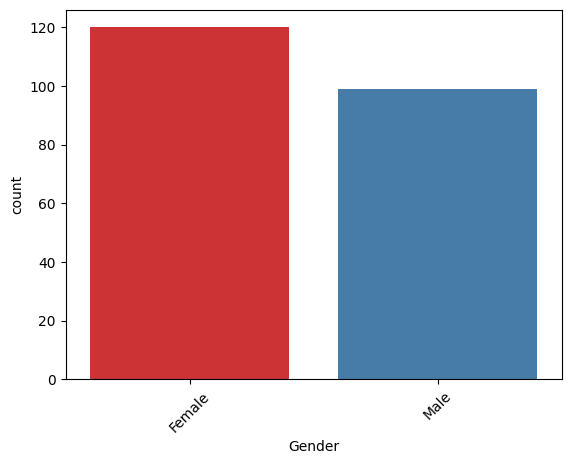

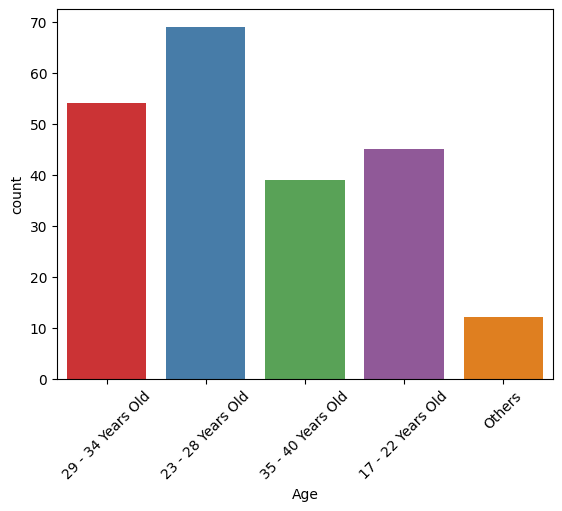

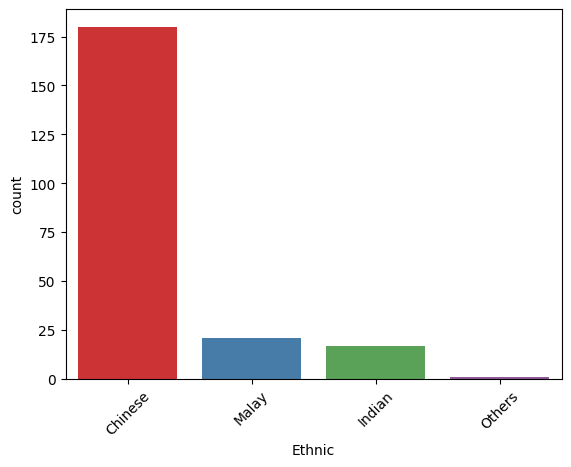

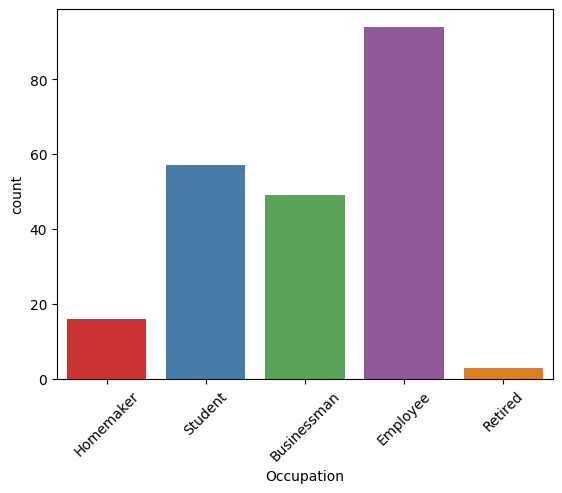

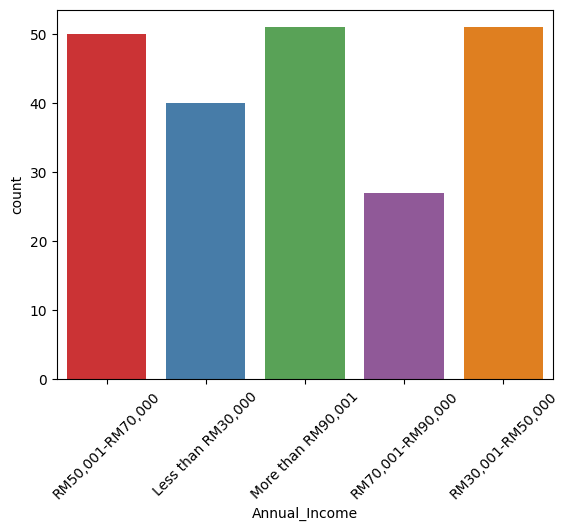

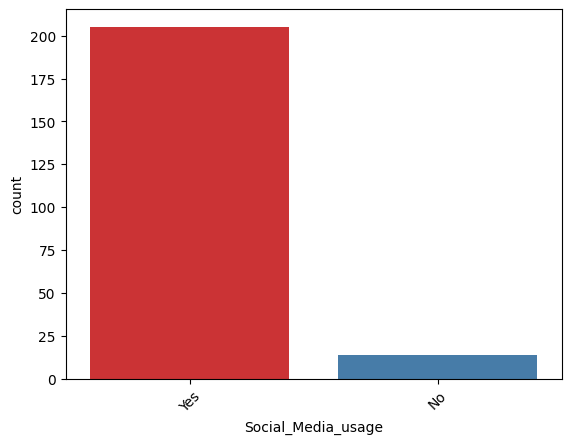

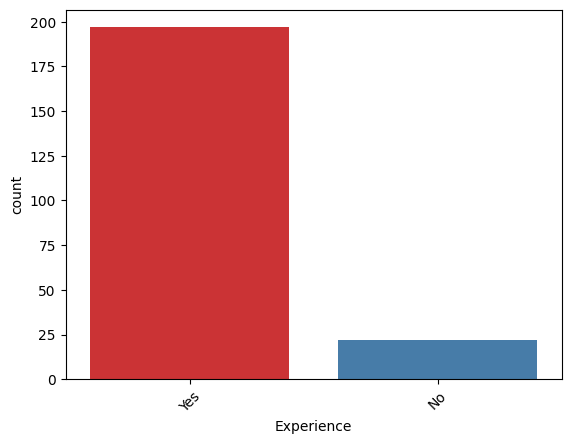

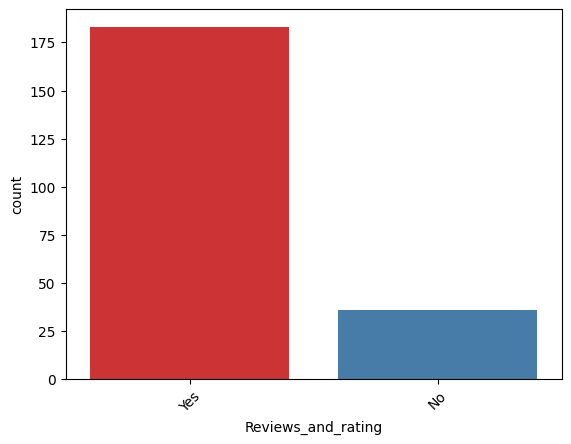

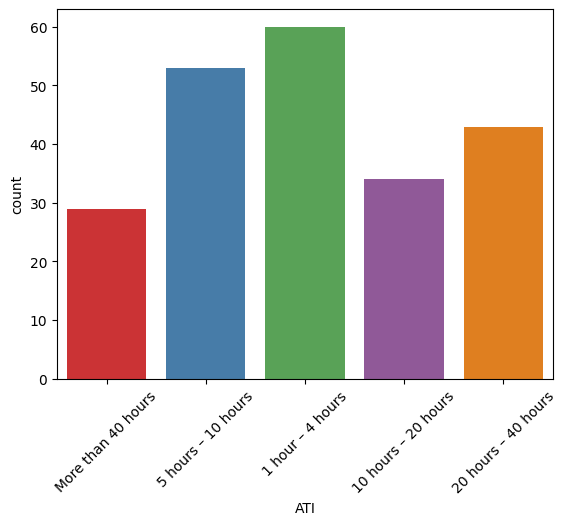

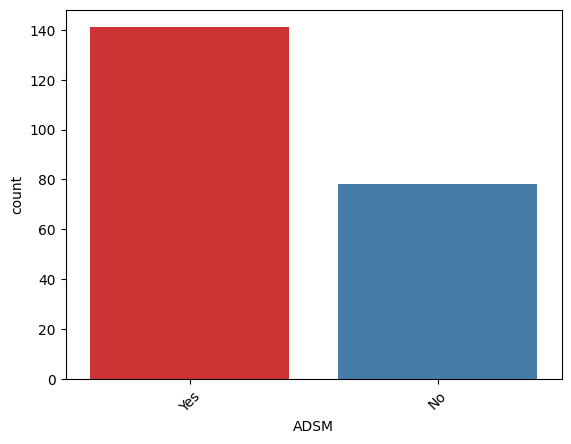

In [ ]:
# fig, ax = plt.subplots(1, 4, figsize=(20, 10))
# fig.suptitle('Count Plot', fontsize=16, x=.5)

# columns = ['Gender', 'Age', 'Ethnic','Occupation']
# for i, col in enumerate(columns):
#     graph = sns.countplot(x=df2[col], ax=ax[i])
#     ax[i].set_title(*[col])
#     graph.bar_label(graph.containers[0])

features = ['Gender', 'Age', 'Ethnic','Occupation', 'Annual_Income', 'Social_Media_usage', 'Experience', 'Reviews_and_rating', 'ATI', 'ADSM' ]

for f in features:
    sns.countplot(x = f, data = df2, palette = 'Set1')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# fig, ax = plt.subplots(1, 3, figsize=(25, 10))
# fig.suptitle('Count Plot', fontsize=16, x=0.92)

# columns = ['Annual_Income', 'Social_Media_usage', 'Experience']
# for i, col in enumerate(columns):
#     graph = sns.countplot(x=df2[col], ax=ax[i])
#     ax[i].set_title(*[col])
#     graph.bar_label(graph.containers[0])

In [ ]:
# fig, ax = plt.subplots(1, 3, figsize=(25, 10))
# fig.suptitle('Count Plot', fontsize=16, x=0.92)

# columns = ['Reviews_and_rating', 'ATI', 'ADSM']
# for i, col in enumerate(columns):
#     graph = sns.countplot(x=df2[col], ax=ax[i])
#     ax[i].set_title(*[col])
#     graph.bar_label(graph.containers[0])

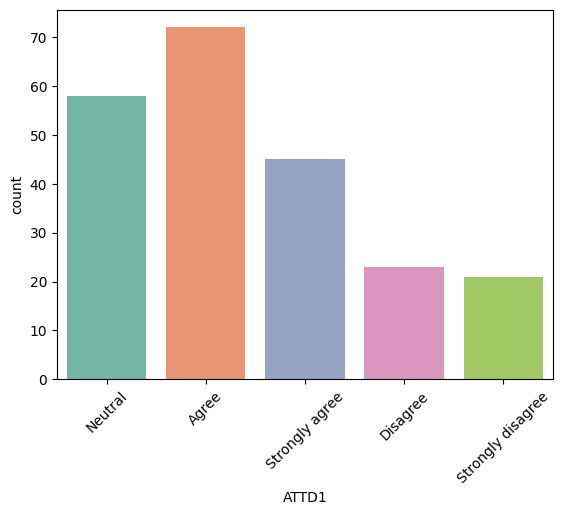

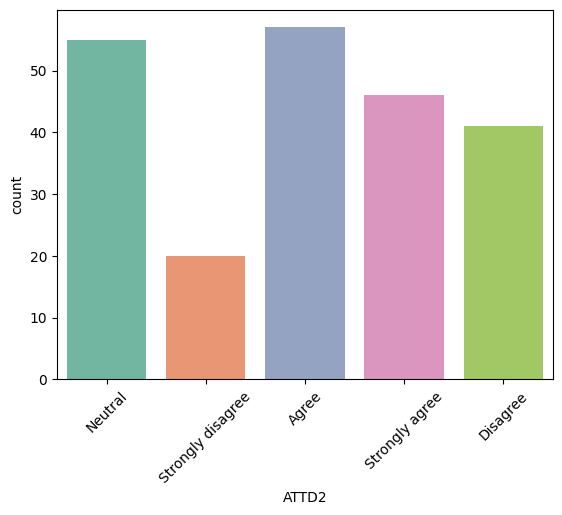

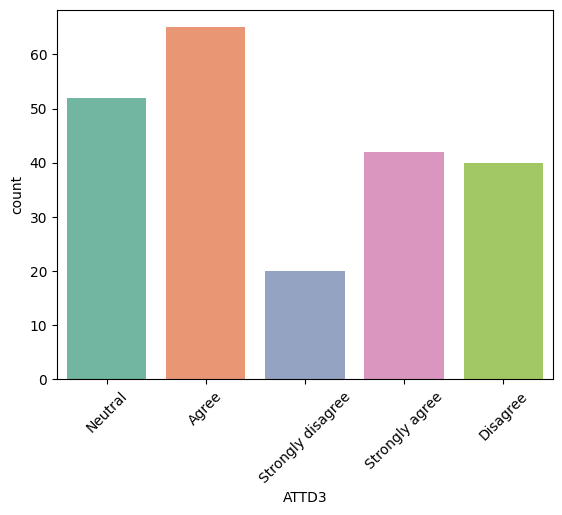

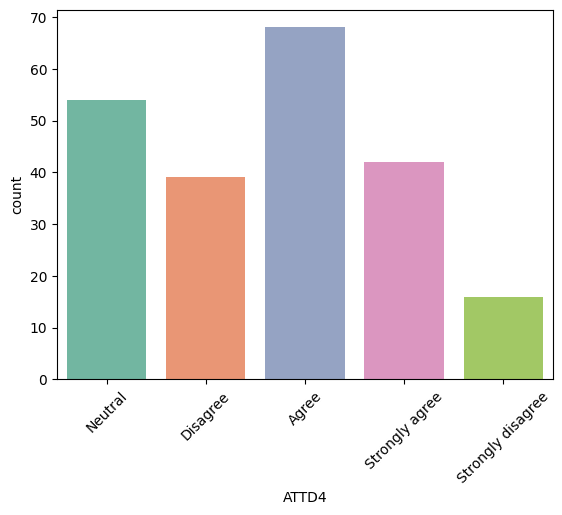

In [ ]:
#count plot of Attitude (ATTD)
features = [ 'ATTD1','ATTD2','ATTD3','ATTD4']

for f in features:
    sns.countplot(x = f, data = df2, palette = 'Set2')
    plt.xticks(rotation=45)
    plt.show()

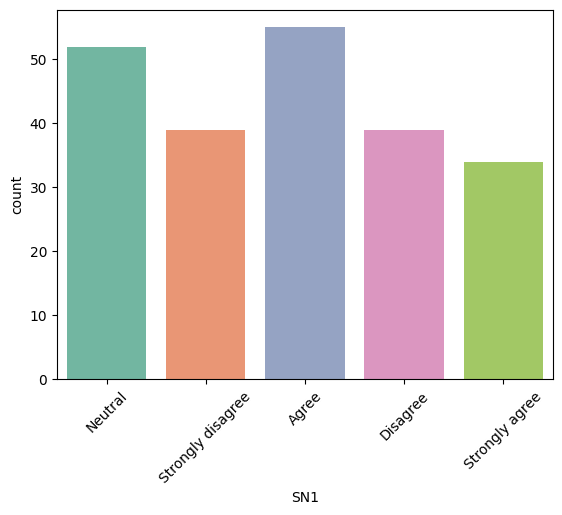

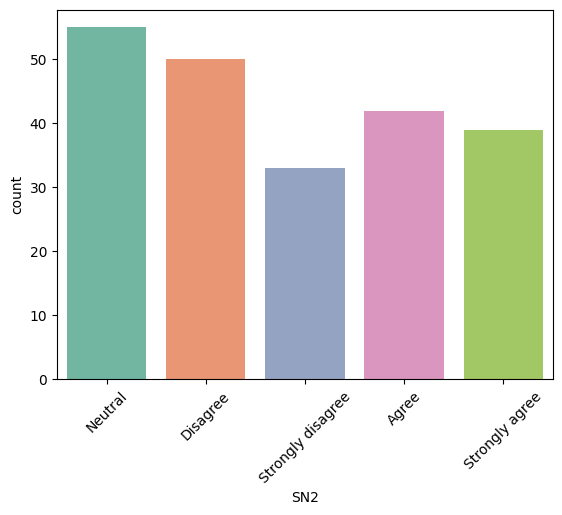

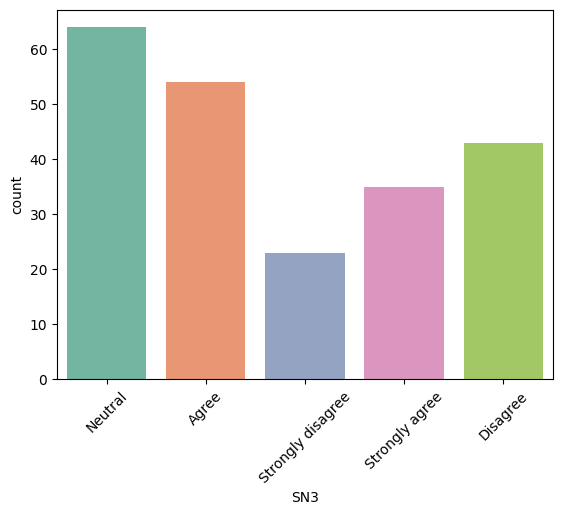

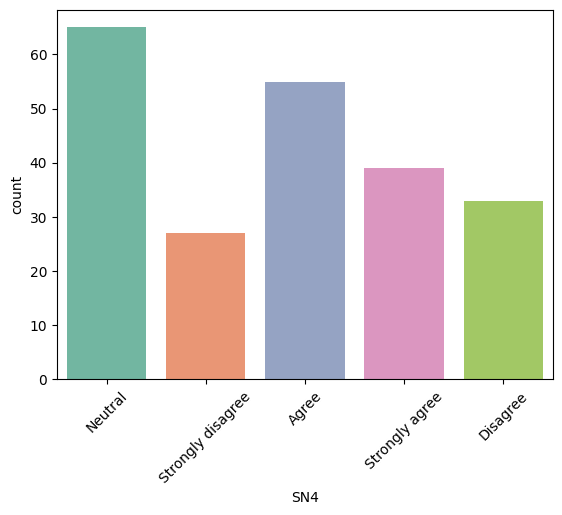

In [ ]:
#count plot of Social Norms (SN)
features = [ 'SN1','SN2','SN3','SN4']

for f in features:
    sns.countplot(x = f, data = df2, palette = 'Set2')
    plt.xticks(rotation=45)
    plt.show()

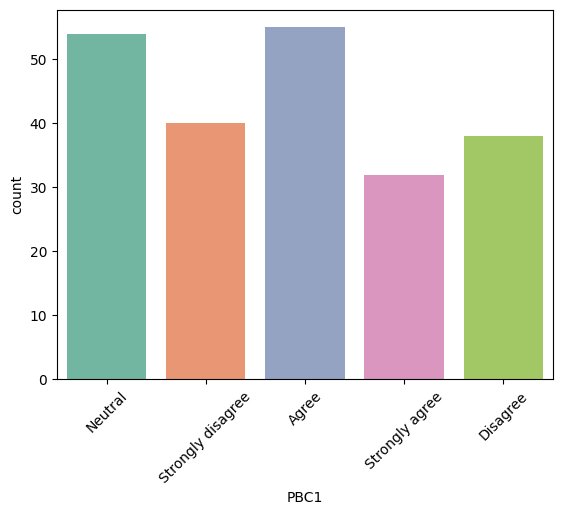

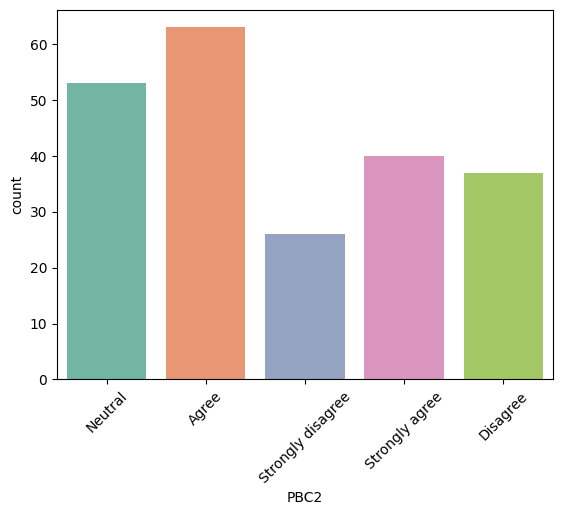

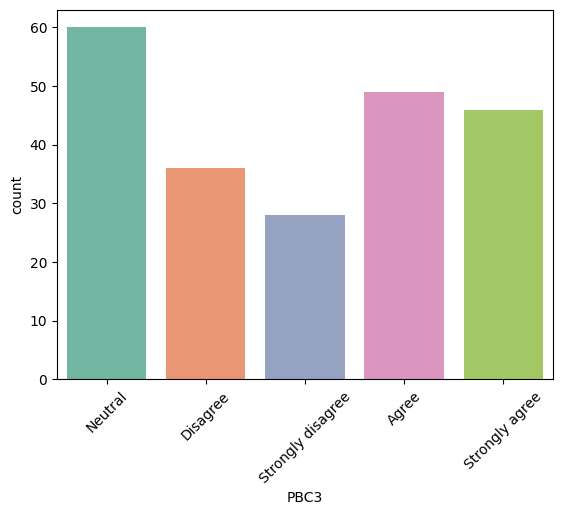

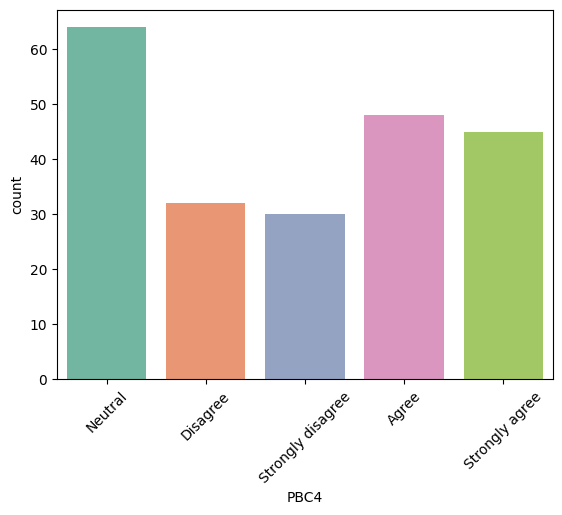

In [ ]:
#count plot of Perceived Behavioural Control (PBC)
features = [ 'PBC1','PBC2','PBC3','PBC4']

for f in features:
    sns.countplot(x = f, data = df2, palette = 'Set2')
    plt.xticks(rotation=45)
    plt.show()

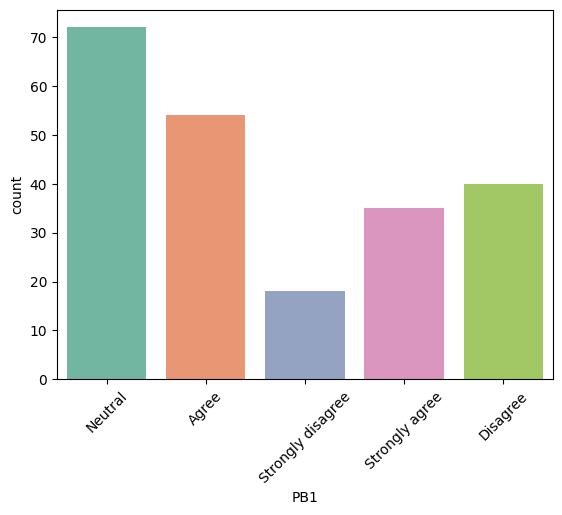

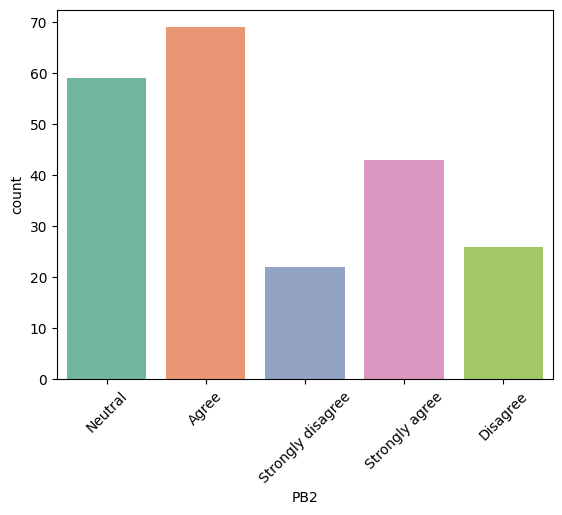

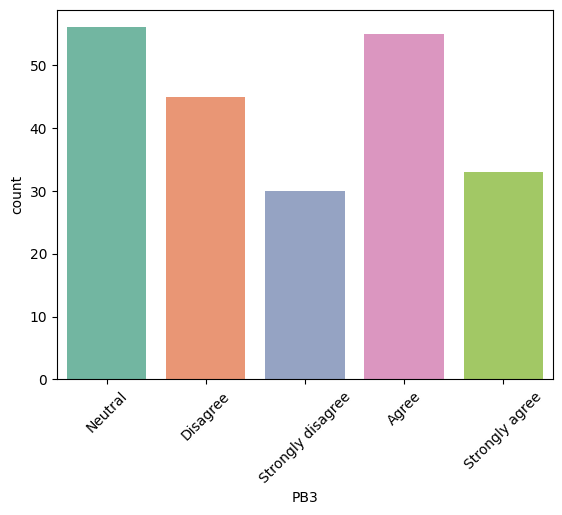

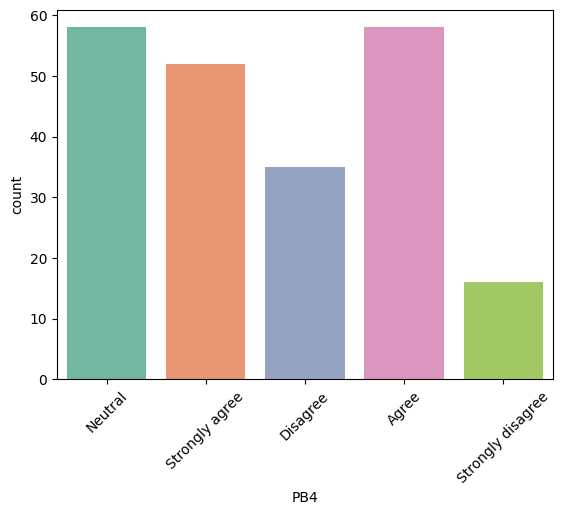

In [ ]:
#count plot of Purchase Behavior (PB)
features = [ 'PB1','PB2','PB3','PB4']

for f in features:
    sns.countplot(x = f, data = df2, palette = 'Set2')
    plt.xticks(rotation=45)
    plt.show()

# DATA PREPROCESSING

In [ ]:
#replacing the categorical value of PB, ATTD, SN and PBC to numerical value
df2 = df2.replace('Strongly agree',5)
df2 = df2.replace('Agree',4)
df2 = df2.replace('Neutral',3)
df2 = df2.replace('Disagree',2)
df2 = df2.replace('Strongly disagree',1)

In [ ]:
# Merging PB1, PB2, PB3, PB4 to PB
df2['PB'] = df2['PB1'] + df2['PB2']+ df2['PB3']+ df2['PB4']

In [ ]:
#Diving the PB target attribute to two class High and Low, we are using mean value 10 as diving criteria
#and Appending a new target attribute PB-inf
rating = []
for row in df2['PB']:
    if row<=12:
        rating.append('LOW')
    else:
        rating.append('HIGH')
df2['PB-inf'] = rating

In [ ]:
df2.head()

,Gender,Age,Ethnic,Occupation,Annual_Income,Social_Media_usage,Experience,Reviews_and_rating,ATI,ADSM,...,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4,PB,PB-inf
0,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,3,3,3,3,3,3,3,3,12,LOW
1,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,1,2,4,3,3,4,2,2,15,HIGH
2,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,No,...,1,1,1,1,1,1,1,1,5,LOW
3,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,Yes,...,3,3,4,4,3,4,3,4,15,HIGH
4,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,No,...,3,2,3,3,3,4,4,4,16,HIGH


<Axes: xlabel='PB', ylabel='Occupation'>

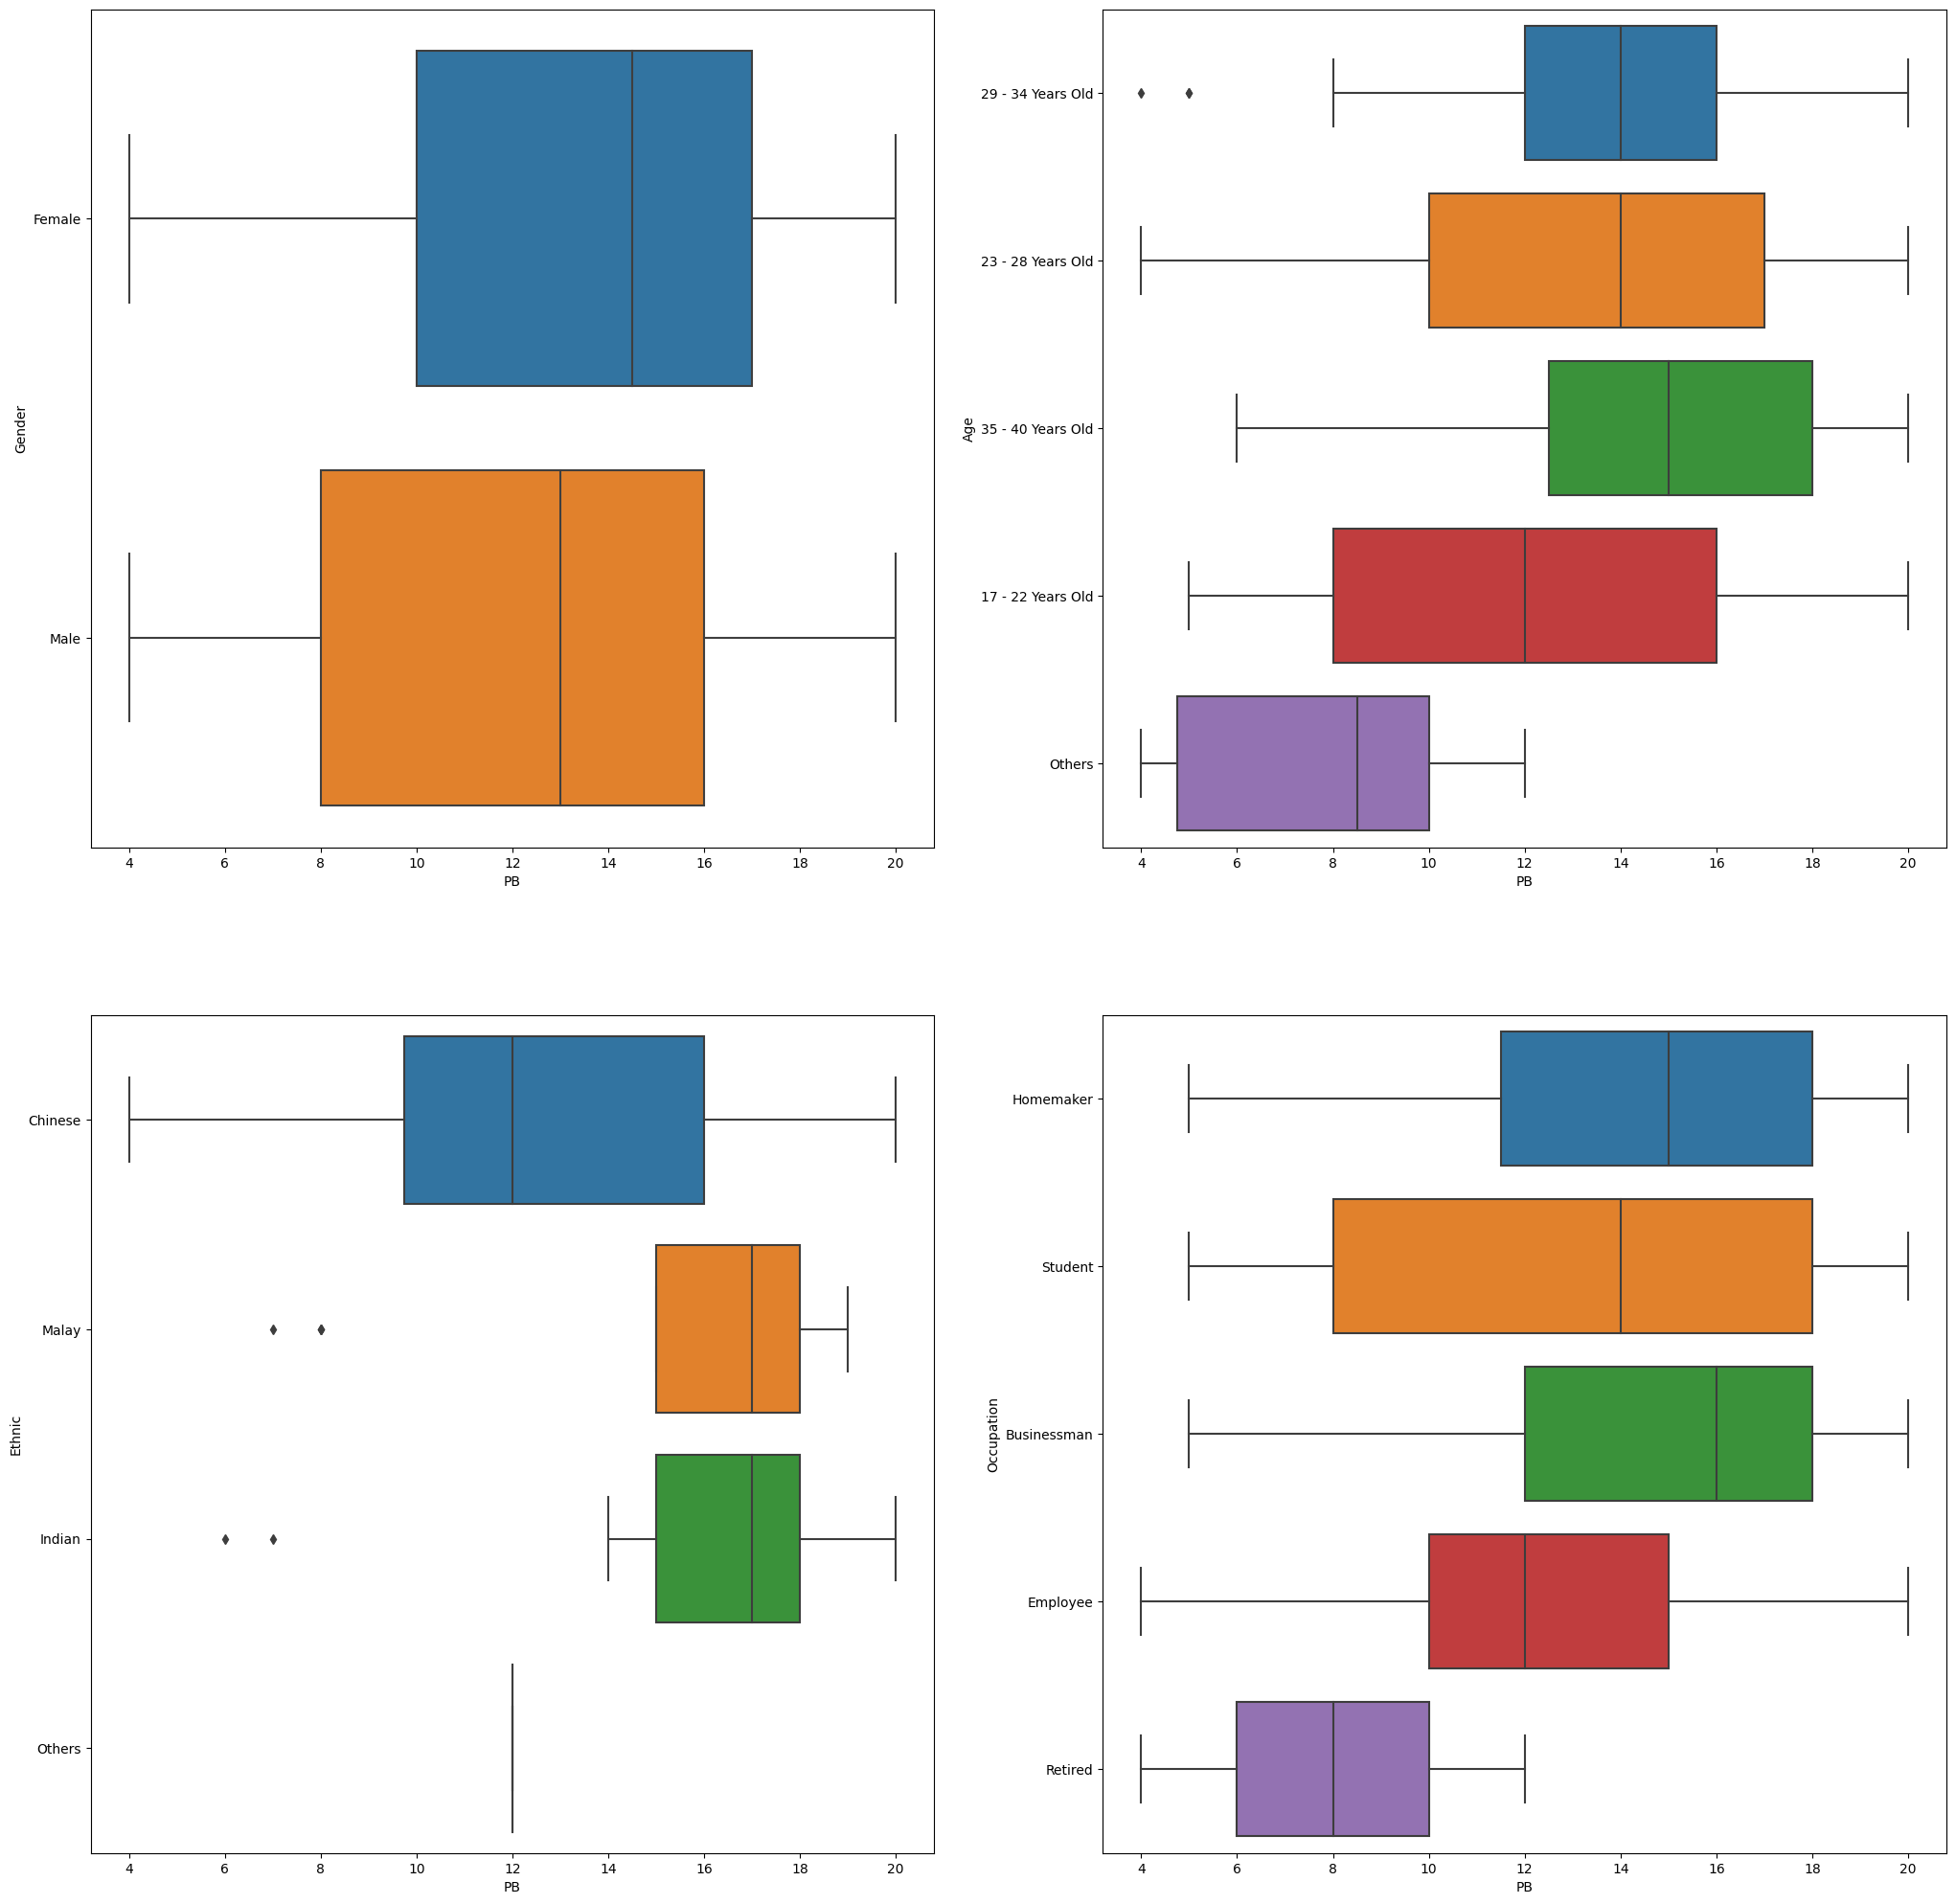

In [ ]:
#set seaborn plotting aesthetics as default
# sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(25, 25))

#create boxplot in each subplot
sns.boxplot(data=df2, x='PB', y='Gender', ax=axes[0,0])
sns.boxplot(data=df2, x='PB', y='Age', ax=axes[0,1])
sns.boxplot(data=df2, x='PB', y='Ethnic', ax=axes[1,0])
sns.boxplot(data=df2, x='PB', y='Occupation', ax=axes[1,1])

<Axes: xlabel='PB', ylabel='Reviews_and_rating'>

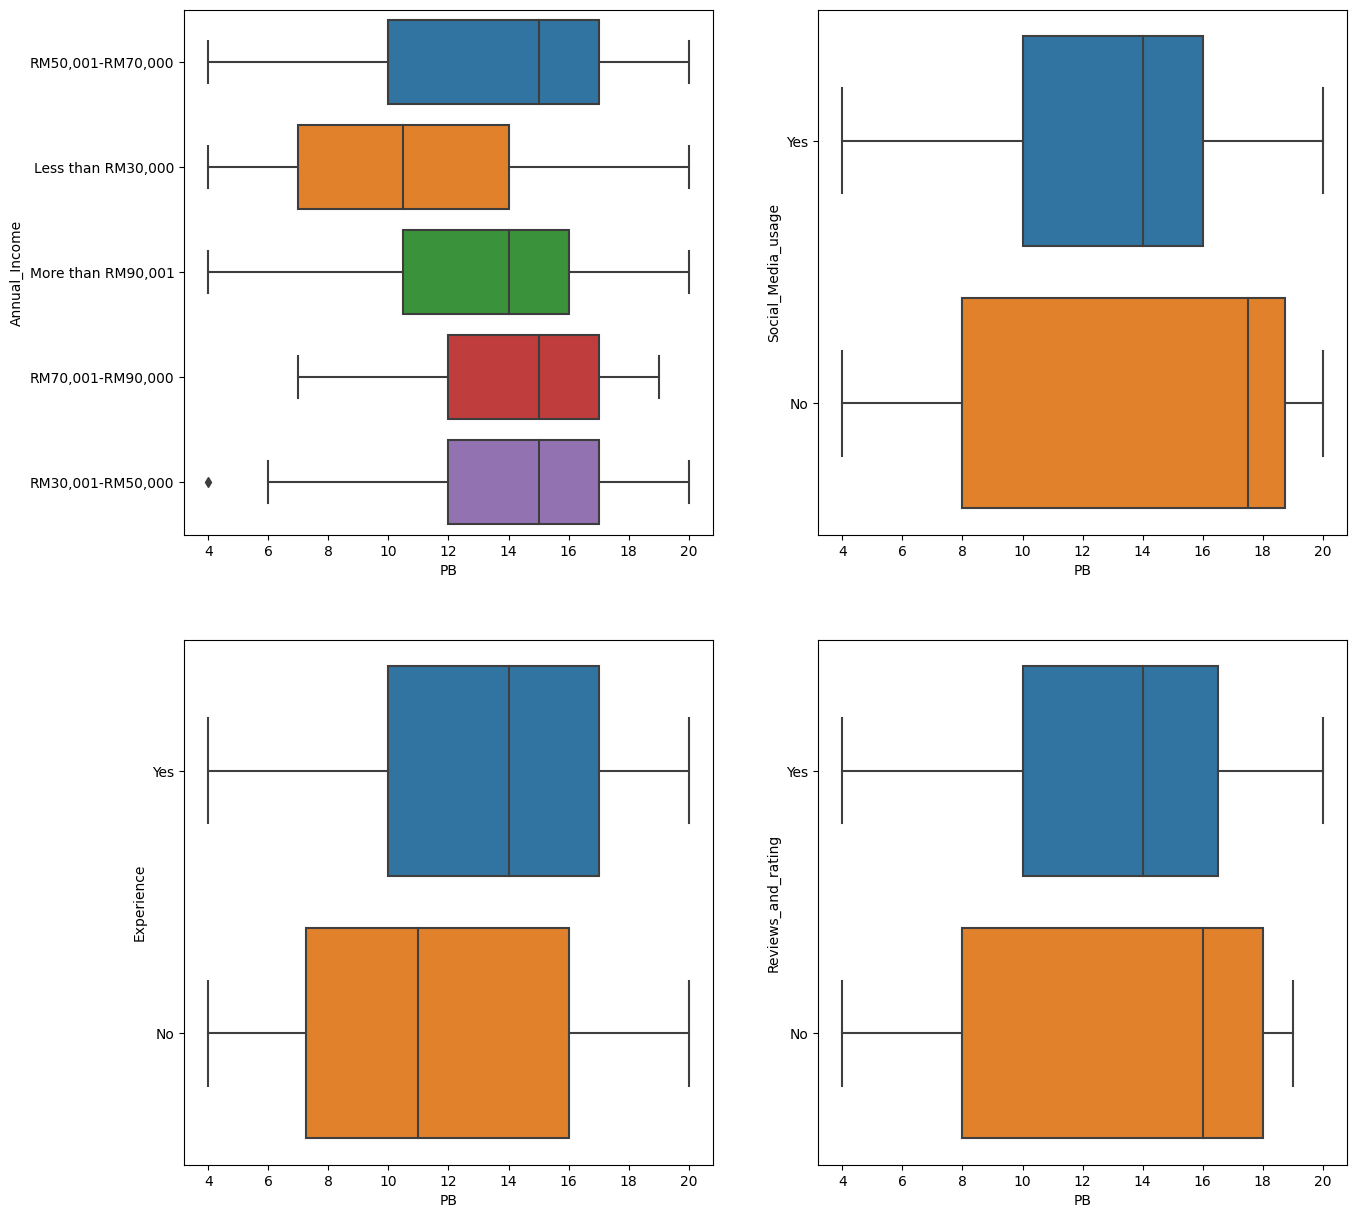

In [ ]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

#create boxplot in each subplot
sns.boxplot(data=df2, x='PB', y='Annual_Income', ax=axes[0,0])
sns.boxplot(data=df2, x='PB', y='Social_Media_usage', ax=axes[0,1])
sns.boxplot(data=df2, x='PB', y='Experience', ax=axes[1,0])
sns.boxplot(data=df2, x='PB', y='Reviews_and_rating', ax=axes[1,1])

<Axes: xlabel='PB', ylabel='ADSM'>

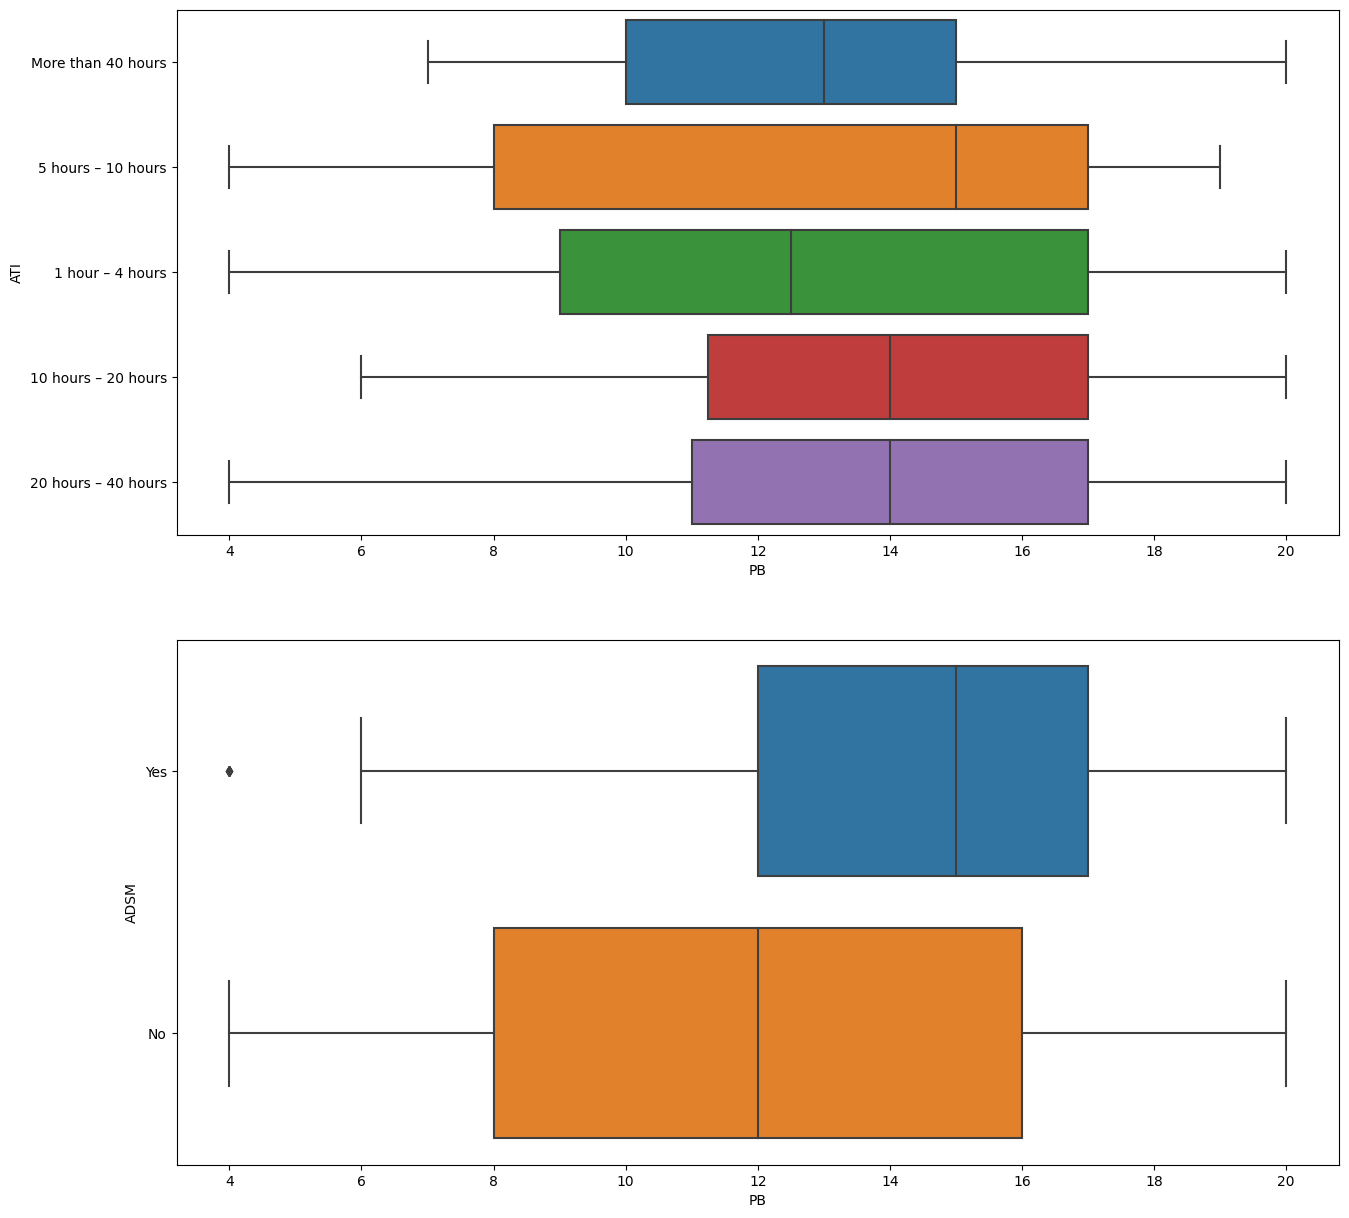

In [ ]:
#define plotting region (2 rows, 1 columns)
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

#create boxplot in each subplot
sns.boxplot(data=df2, x='PB', y='ATI', ax=axes[0])
sns.boxplot(data=df2, x='PB', y='ADSM', ax=axes[1])

In [ ]:
#Droping  PB1,PB2,PB3,PB4,PB and keeping PB-inf instead
df3= df2.drop(columns = ['PB1','PB2','PB3','PB4','PB'], inplace = True)
print(df2.shape)
df2.head()

(219, 23)


,Gender,Age,Ethnic,Occupation,Annual_Income,Social_Media_usage,Experience,Reviews_and_rating,ATI,ADSM,...,ATTD4,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4,PB-inf
0,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,3,3,3,3,3,3,3,3,3,LOW
1,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,3,1,2,4,3,3,4,2,2,HIGH
2,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,No,...,2,1,1,1,1,1,1,1,1,LOW
3,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,Yes,...,3,3,3,4,4,3,4,3,4,HIGH
4,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,No,...,4,3,2,3,3,3,4,4,4,HIGH


In [ ]:
#According to Theory of Planned behaviour, in order to predict Purchase Behaviour-PB we only need find the relationship between ATTD, SN, PBC
#Hence Droping all the column except ATTD, SN, PBC to Predict PB
colsToDrop = ['Gender', 'Age', 'Ethnic','Occupation','Annual_Income','Social_Media_usage','Experience','Reviews_and_rating','ATI','ADSM']
df2.drop(columns = colsToDrop, inplace = True)
y = df2['PB-inf']
X = df2.drop(columns = 'PB-inf')

# Hold Out Validation

In [ ]:
#Spliting Ratio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

# ZeroR Classifier

##### ZeroR classifer used to detect whether the dataset is balanced or not

In [ ]:
# The Confusion matrix Function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):

    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 20)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, dummy_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

        HIGH       0.55      1.00      0.71        24
         LOW       0.00      0.00      0.00        20

    accuracy                           0.55        44
   macro avg       0.27      0.50      0.35        44
weighted avg       0.30      0.55      0.39        44

Train Accuracy:  0.5542857142857143
Test Accuracy:  0.5454545454545454


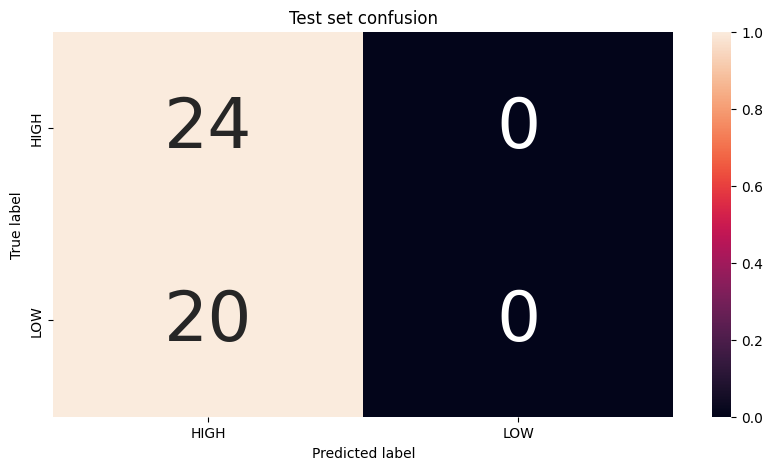

In [ ]:
y_pred = dummy_clf.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=dummy_clf.classes_, title='Test set confusion')

# KNN Classifier

              precision    recall  f1-score   support

        HIGH       0.95      0.75      0.84        24
         LOW       0.76      0.95      0.84        20

    accuracy                           0.84        44
   macro avg       0.85      0.85      0.84        44
weighted avg       0.86      0.84      0.84        44

Train Accuracy:  0.92
Test Accuracy:  0.8409090909090909


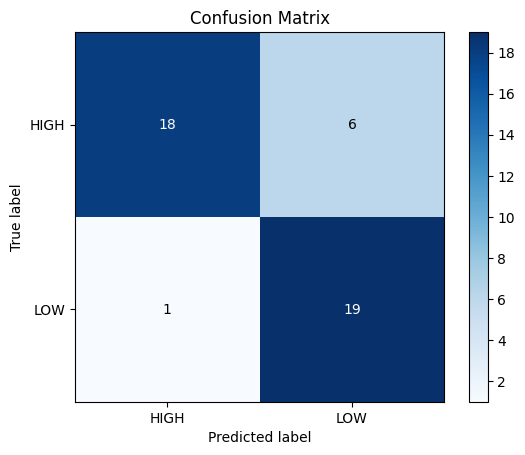

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Minkowski Distance Metric and K = 5
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

#plotting consusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

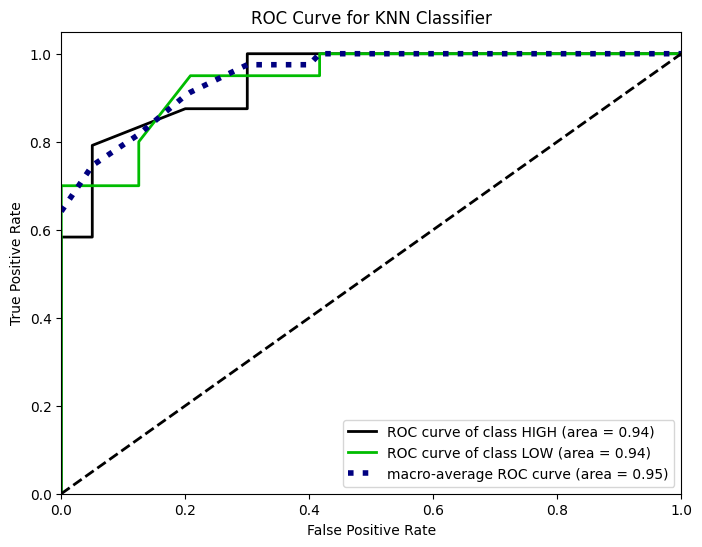

In [ ]:
#plotting ROC curve
y_probas = knn_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = True,
                      title = "ROC Curve for KNN Classifier");

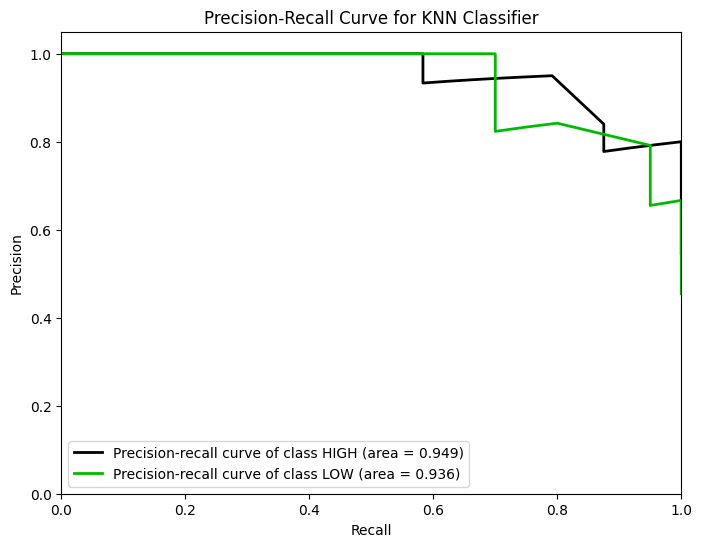

In [ ]:
#plotting PRC curve
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for KNN Classifier");

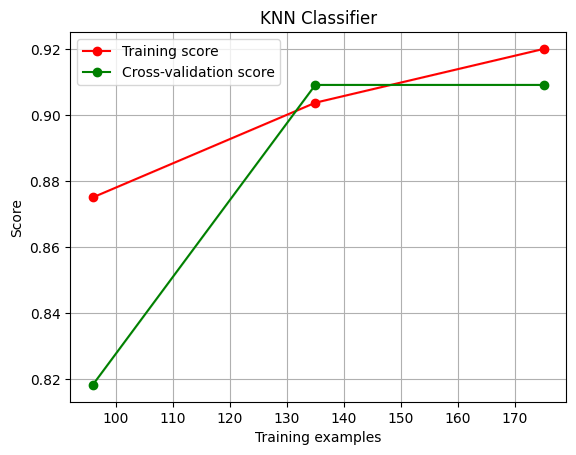

In [ ]:
#Plotting learning curve
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(knn_clf, X, y, cv = cv,title = "KNN Classifier");

# Decision Tree Classifier

              precision    recall  f1-score   support

        HIGH       0.86      0.79      0.83        24
         LOW       0.77      0.85      0.81        20

    accuracy                           0.82        44
   macro avg       0.82      0.82      0.82        44
weighted avg       0.82      0.82      0.82        44

Train Accuracy:  0.9771428571428571
Test Accuracy:  0.8181818181818182


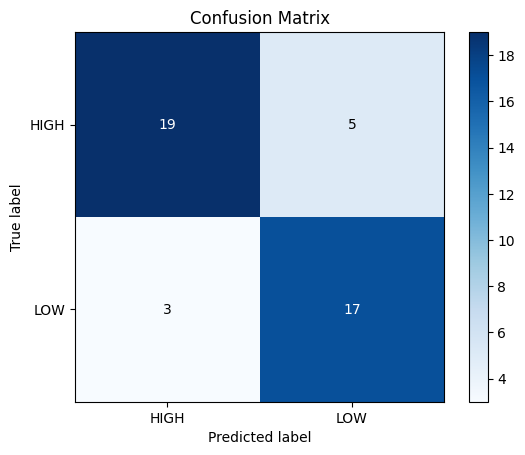

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

tree_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth= 5)
tree_clf.fit(X_train, y_train)
train_prediction = tree_clf.predict(X_train)
test_prediction = tree_clf.predict(X_test)

#plotting confusion matrix for DT
skplt.metrics.plot_confusion_matrix(y_test, test_prediction);
print(classification_report(y_test, test_prediction))
print("Train Accuracy: ", accuracy_score(y_train, train_prediction))
print("Test Accuracy: ", accuracy_score(y_test, test_prediction))

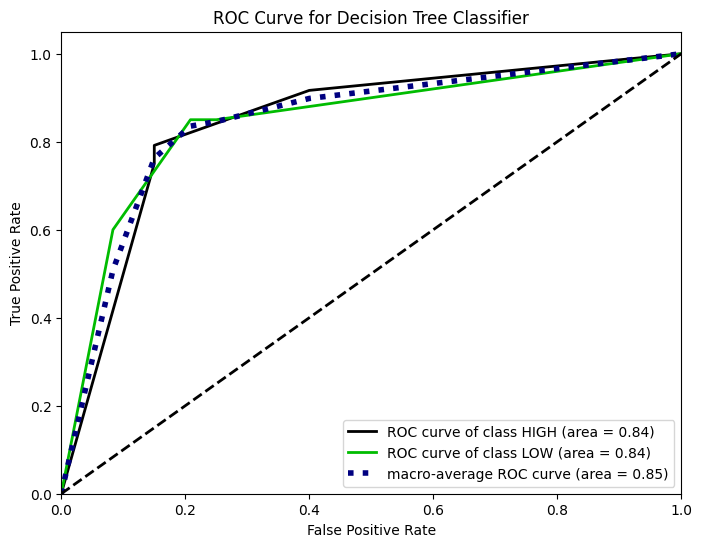

In [ ]:
#Plotting ROC curve for DT
y_probas = tree_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = True,
                      title = "ROC Curve for Decision Tree Classifier");

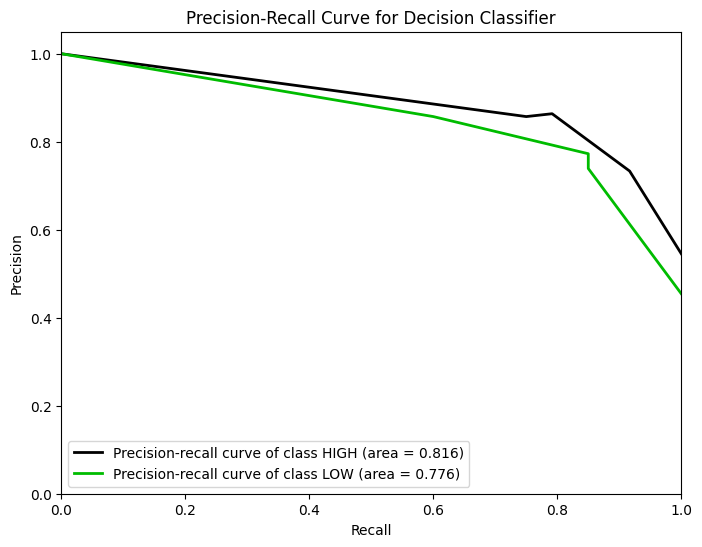

In [ ]:
#plotting PRC curve for DT
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Decision Classifier");

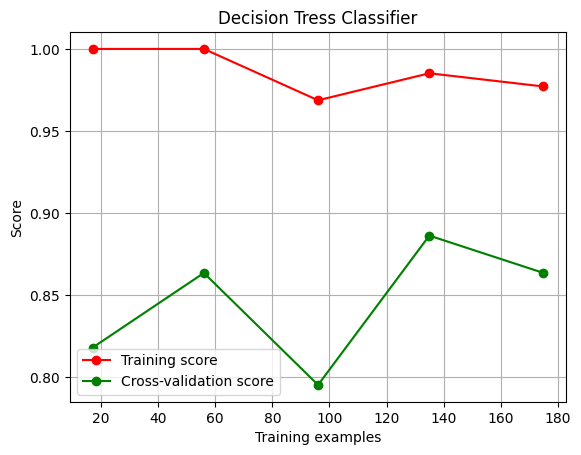

In [ ]:
#Plotting learning curve for DT
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(tree_clf, X, y, cv = cv,title = "Decision Tress Classifier");

[Text(0.5568181818181818, 0.9166666666666666, 'x[2] <= 3.5\nentropy = 0.991\nsamples = 175\nvalue = [97, 78]'),
 Text(0.29545454545454547, 0.75, 'x[3] <= 3.5\nentropy = 0.659\nsamples = 88\nvalue = [15, 73]'),
 Text(0.13636363636363635, 0.5833333333333334, 'x[9] <= 2.5\nentropy = 0.35\nsamples = 76\nvalue = [5, 71]'),
 Text(0.09090909090909091, 0.4166666666666667, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47]'),
 Text(0.18181818181818182, 0.4166666666666667, 'x[0] <= 3.5\nentropy = 0.663\nsamples = 29\nvalue = [5, 24]'),
 Text(0.09090909090909091, 0.25, 'x[4] <= 3.5\nentropy = 0.414\nsamples = 24\nvalue = [2, 22]'),
 Text(0.045454545454545456, 0.08333333333333333, 'entropy = 0.267\nsamples = 22\nvalue = [1, 21]'),
 Text(0.13636363636363635, 0.08333333333333333, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2727272727272727, 0.25, 'x[7] <= 2.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.22727272727272727, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0

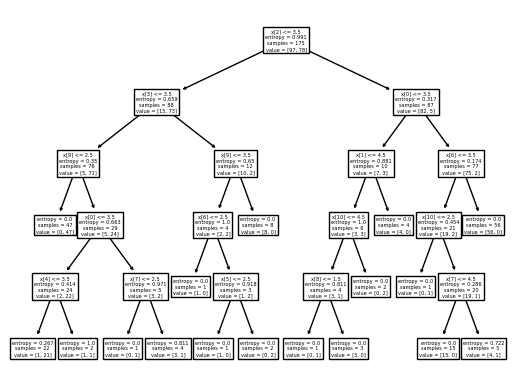

In [ ]:
from sklearn import tree
tree.plot_tree(tree_clf)

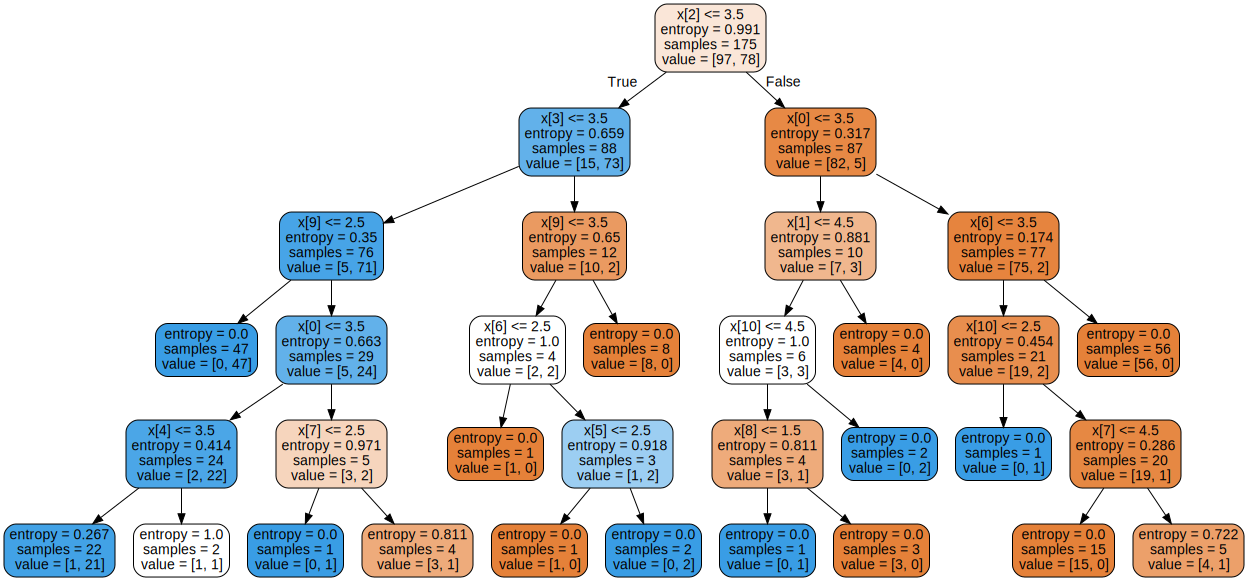

In [ ]:
#Visualization of DT using graphviz
import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, filled = True, rounded = True, special_characters=False)
graph = graphviz.Source(dot_data)
graph

# Logistic Regression

              precision    recall  f1-score   support

        HIGH       0.95      0.79      0.86        24
         LOW       0.79      0.95      0.86        20

    accuracy                           0.86        44
   macro avg       0.87      0.87      0.86        44
weighted avg       0.88      0.86      0.86        44

Train Accuracy 0.9085714285714286
Test Accuracy 0.8636363636363636


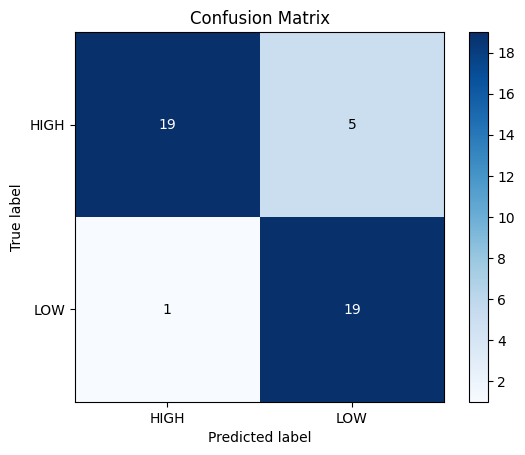

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression(C =0.1, solver ='newton-cg')
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

#ploting confusion matrix for logistic regression
skplt.metrics.plot_confusion_matrix(y_test, pred_test);
print(classification_report(y_test, pred_test))
print("Train Accuracy", accuracy_score(y_train, pred_train))
print("Test Accuracy", accuracy_score(y_test, pred_test))

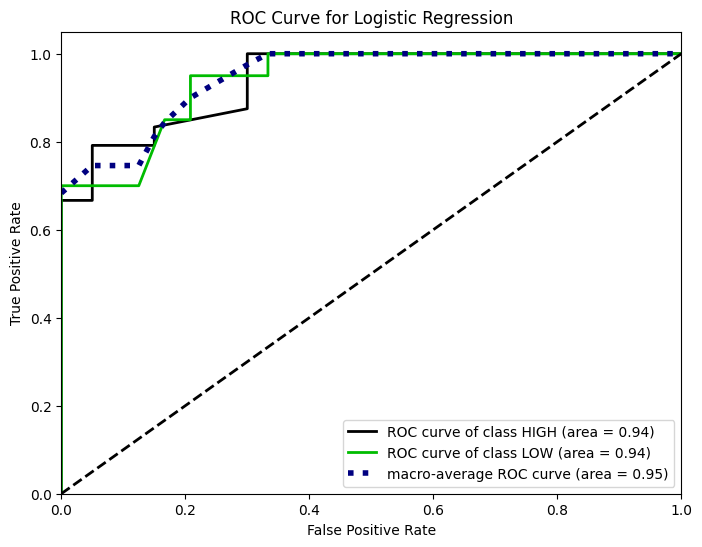

In [ ]:
#ploting ROC curve for logistic regression
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = True,
                      title = "ROC Curve for Logistic Regression");

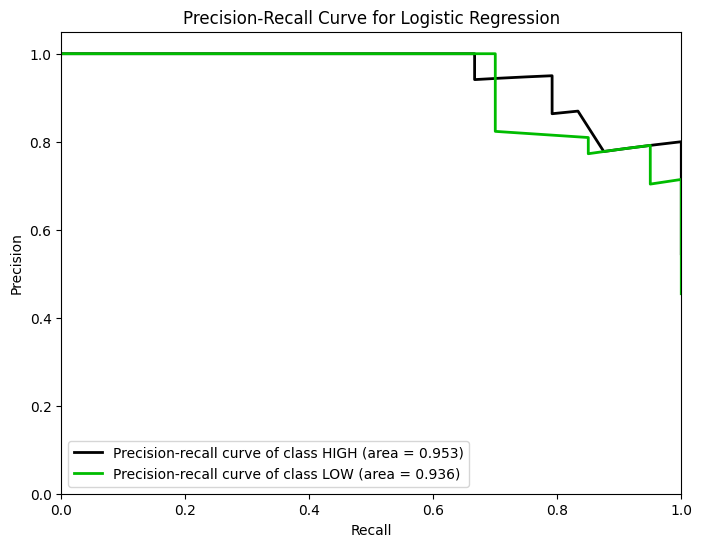

In [ ]:
#ploting PRC for logistic regression
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Logistic Regression");

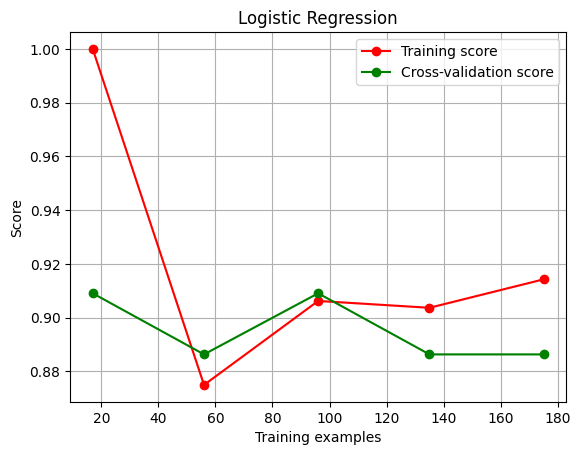

In [ ]:
#ploting learning curve for logistic regression
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(model, X, y, cv = cv,title = "Logistic Regression");

# Naive Bayes Classifier

              precision    recall  f1-score   support

        HIGH       0.95      0.79      0.86        24
         LOW       0.79      0.95      0.86        20

    accuracy                           0.86        44
   macro avg       0.87      0.87      0.86        44
weighted avg       0.88      0.86      0.86        44

Train Accuracy 0.8914285714285715
Test Accuracy 0.8636363636363636


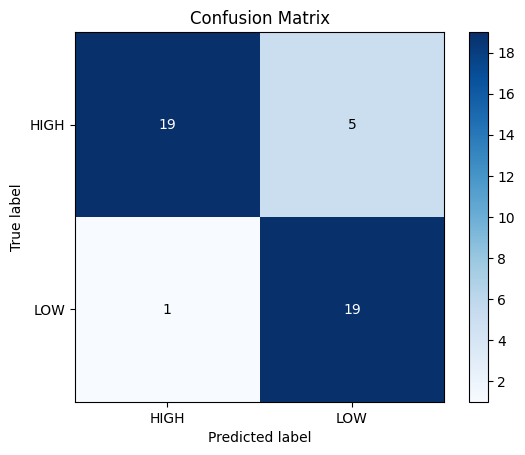

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred = naive.predict(X_test)

#ploting confusion matrix for Naive Bayes
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(y_train, naive.predict(X_train)))
print("Test Accuracy", accuracy_score(y_test, naive.predict(X_test)))

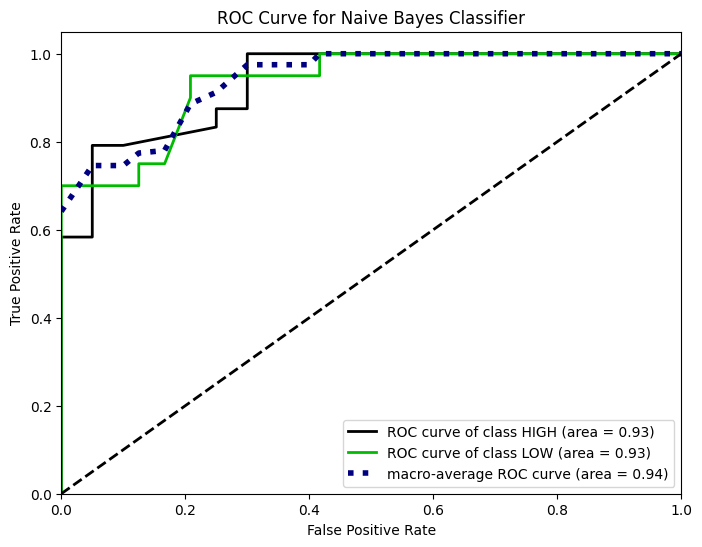

In [ ]:
#ploting ROC for Naive Bayes
y_probas = naive.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = True,
                      title = "ROC Curve for Naive Bayes Classifier");

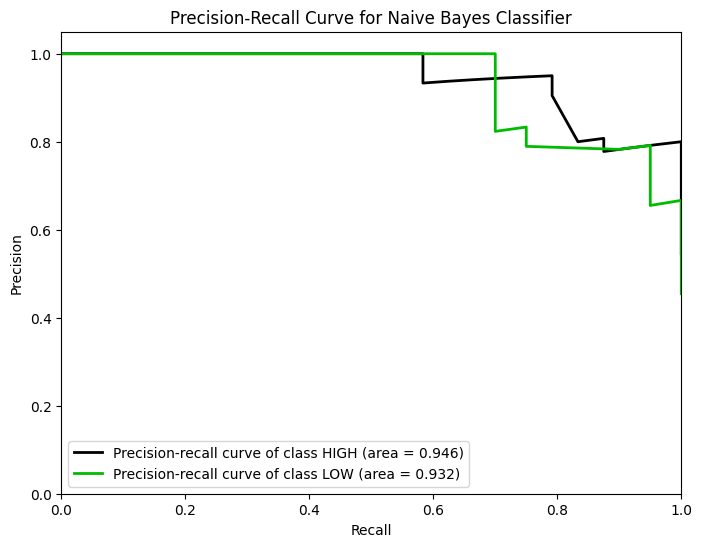

In [ ]:
#ploting PRC for Naive Bayes
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Naive Bayes Classifier");

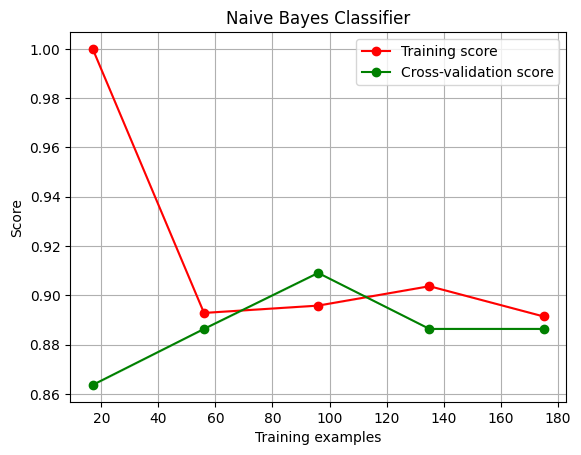

In [ ]:
#ploting learning curve for Naive Bayes
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(naive, X, y, cv = cv,
                      title = "Naive Bayes Classifier");

# Support Vector Machine (SVM) Classifier

              precision    recall  f1-score   support

        HIGH       0.95      0.79      0.86        24
         LOW       0.79      0.95      0.86        20

    accuracy                           0.86        44
   macro avg       0.87      0.87      0.86        44
weighted avg       0.88      0.86      0.86        44

Train Accuracy 0.9314285714285714
Test Accuracy 0.8636363636363636


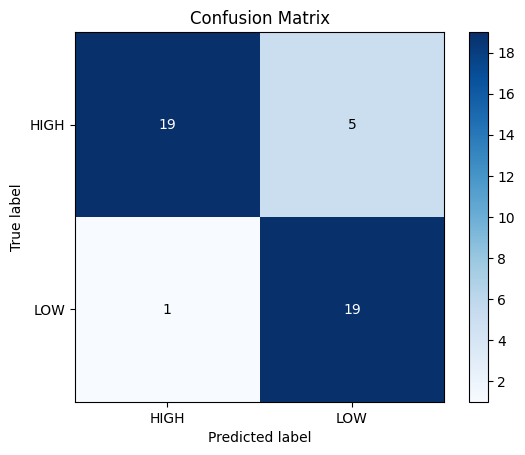

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

svm = SVC(C =0.1, gamma='scale', kernel='linear',probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

#ploting confusion matrix for SVM
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(svm.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(svm.predict(X_test), y_test))

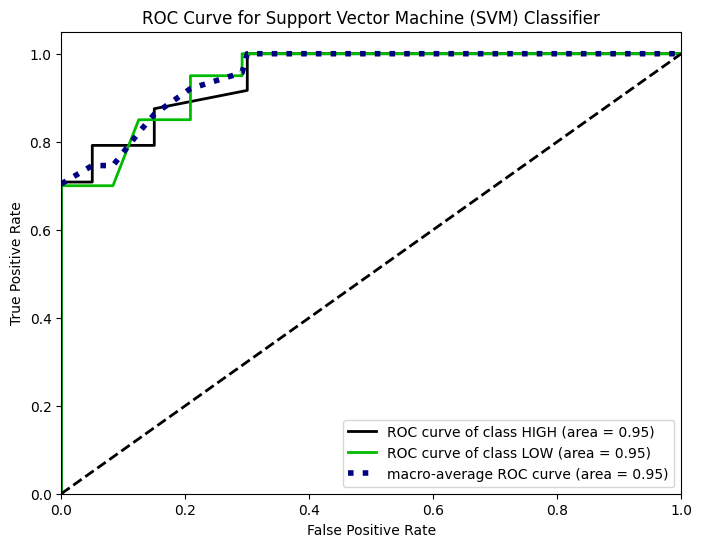

In [ ]:
#ploting ROC curve for SVM
y_probas = svm.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = True,
                      title = "ROC Curve for Support Vector Machine (SVM) Classifier");

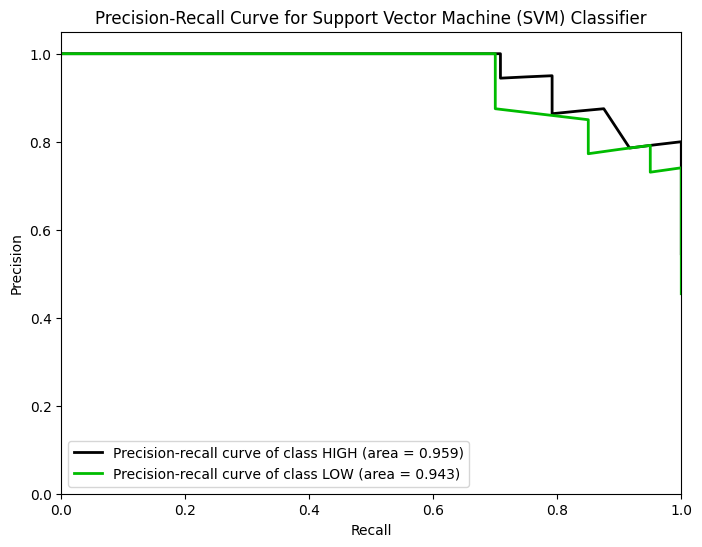

In [ ]:
#ploting PRC curve for SVM
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Support Vector Machine (SVM) Classifier");

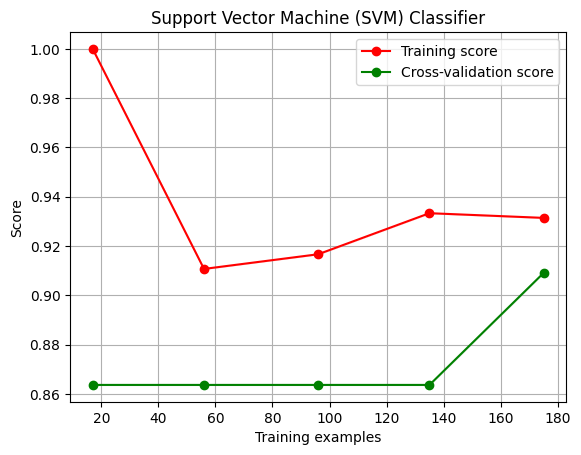

In [ ]:
#ploting learning for SVM
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(svm, X, y, cv = cv,
                      title = "Support Vector Machine (SVM) Classifier");

# Ensemble Classifiers

## Random Forest Classifier

              precision    recall  f1-score   support

        HIGH       0.91      0.88      0.89        24
         LOW       0.86      0.90      0.88        20

    accuracy                           0.89        44
   macro avg       0.89      0.89      0.89        44
weighted avg       0.89      0.89      0.89        44

Train Accuracy 0.9828571428571429
Test Accuracy 0.8863636363636364


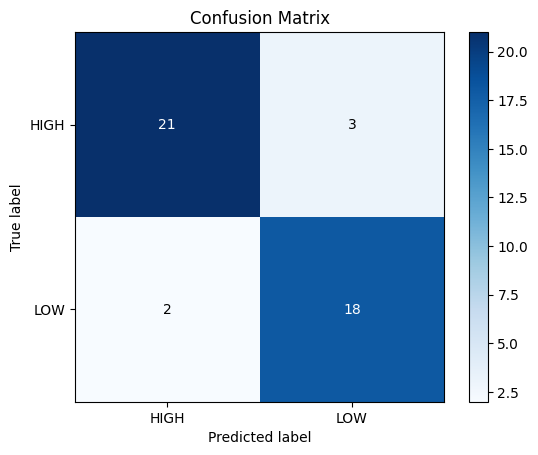

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(criterion='gini', max_depth= 6, n_estimators =100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#ploting confusion matrix for RF
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(clf.predict(X_test), y_test))

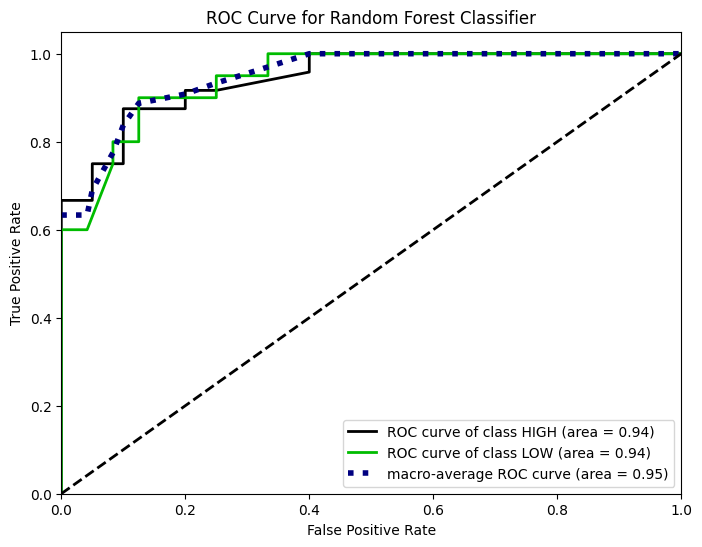

In [ ]:
#ploting ROC curve for RF
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = True,
                      title = "ROC Curve for Random Forest Classifier");

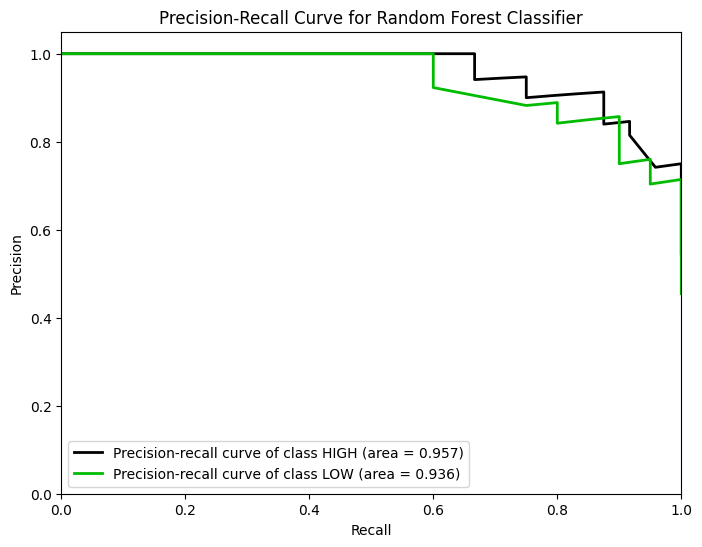

In [ ]:
#ploting PRC curve for RF
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Random Forest Classifier");

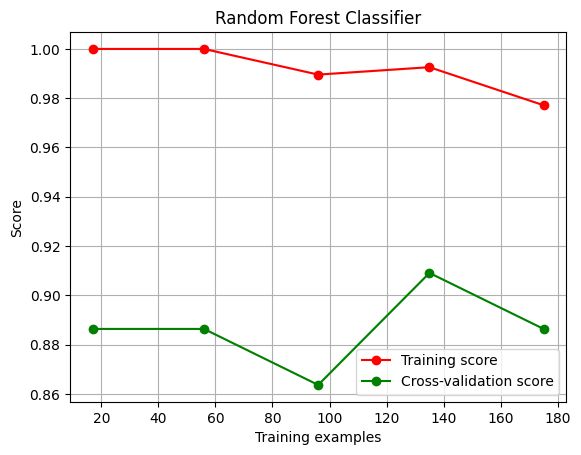

In [ ]:
#ploting Learning curve for RF
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(clf, X, y, cv = cv,title = "Random Forest Classifier");

# AdaBoost Classifier

              precision    recall  f1-score   support

        HIGH       0.91      0.83      0.87        24
         LOW       0.82      0.90      0.86        20

    accuracy                           0.86        44
   macro avg       0.86      0.87      0.86        44
weighted avg       0.87      0.86      0.86        44

Train Accuracy 0.9428571428571428
Test Accuracy 0.8636363636363636


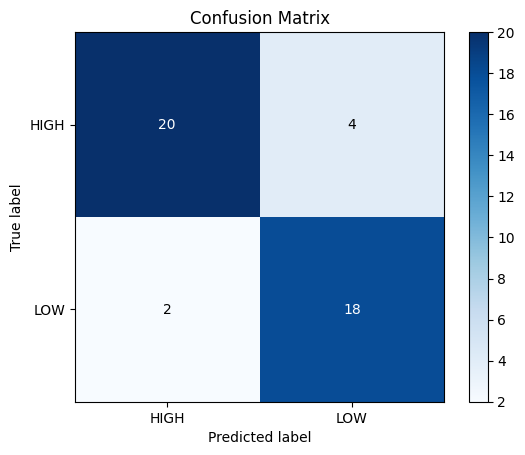

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Ada_clf = AdaBoostClassifier(learning_rate=0.1, n_estimators=50)
Ada_clf.fit(X_train, y_train)
y_pred = Ada_clf.predict(X_test)

#ploting confusion matrix for AdaBoost
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(Ada_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(Ada_clf.predict(X_test), y_test))

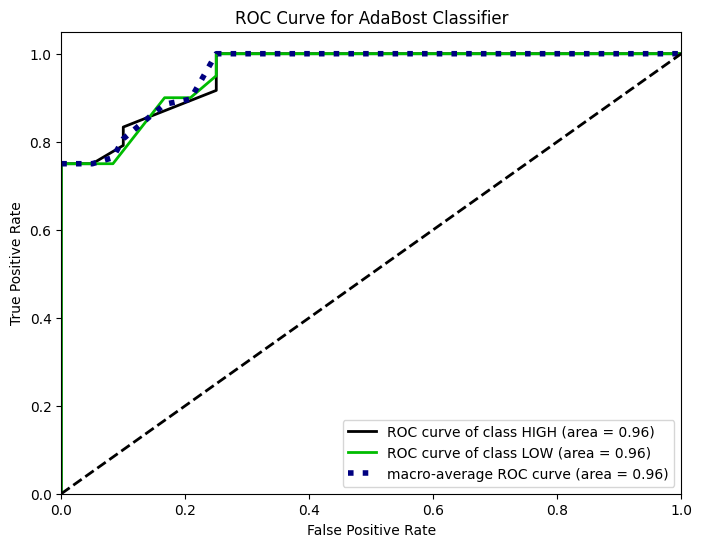

In [ ]:
#ploting ROC curve for AdaBoost
y_probas = Ada_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = True,
                      title = "ROC Curve for AdaBost Classifier");

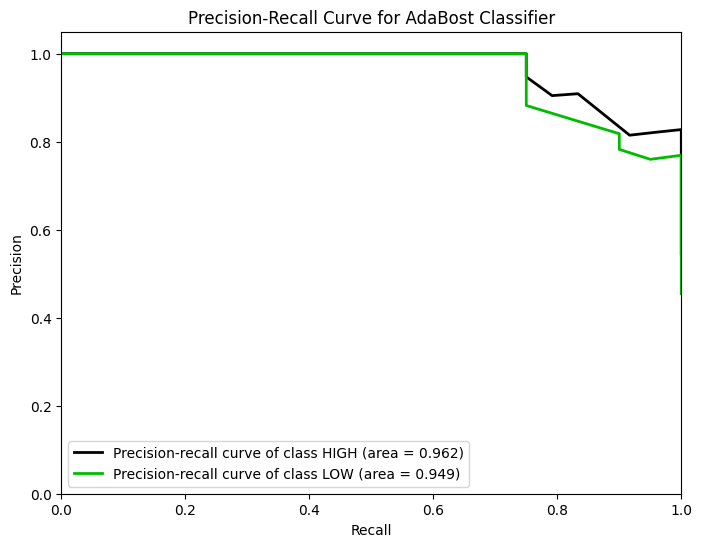

In [ ]:
#ploting PRC curve for Adaboost
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for AdaBost Classifier");

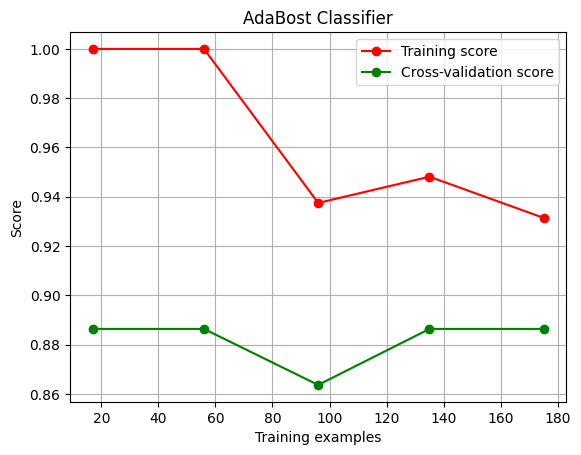

In [ ]:
#ploting learning curve for Adaboost
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(Ada_clf, X, y, cv = cv,title = "AdaBost Classifier");

#Gradient Boosting Classifier

              precision    recall  f1-score   support

        HIGH       0.95      0.88      0.91        24
         LOW       0.86      0.95      0.90        20

    accuracy                           0.91        44
   macro avg       0.91      0.91      0.91        44
weighted avg       0.91      0.91      0.91        44

Train Accuracy 0.9942857142857143
Test Accuracy 0.9090909090909091


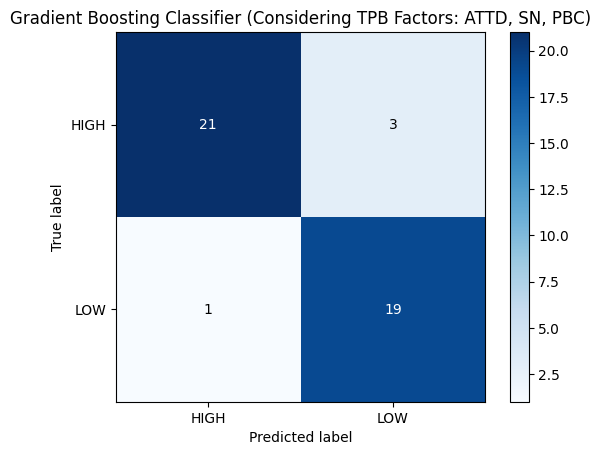

In [ ]:

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

xgb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=2)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

#plotting confusion matrix for GB
skplt.metrics.plot_confusion_matrix(y_test, y_pred,title = "Gradient Boosting Classifier (Considering TPB Factors: ATTD, SN, PBC)");
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(xgb_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(xgb_clf.predict(X_test), y_test))

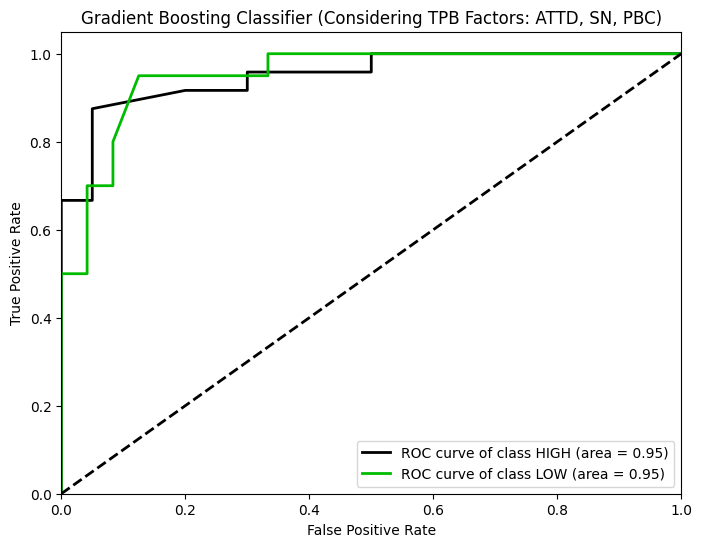

In [ ]:
#plotting ROC curve for GB
y_probas = xgb_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "Gradient Boosting Classifier (Considering TPB Factors: ATTD, SN, PBC)");

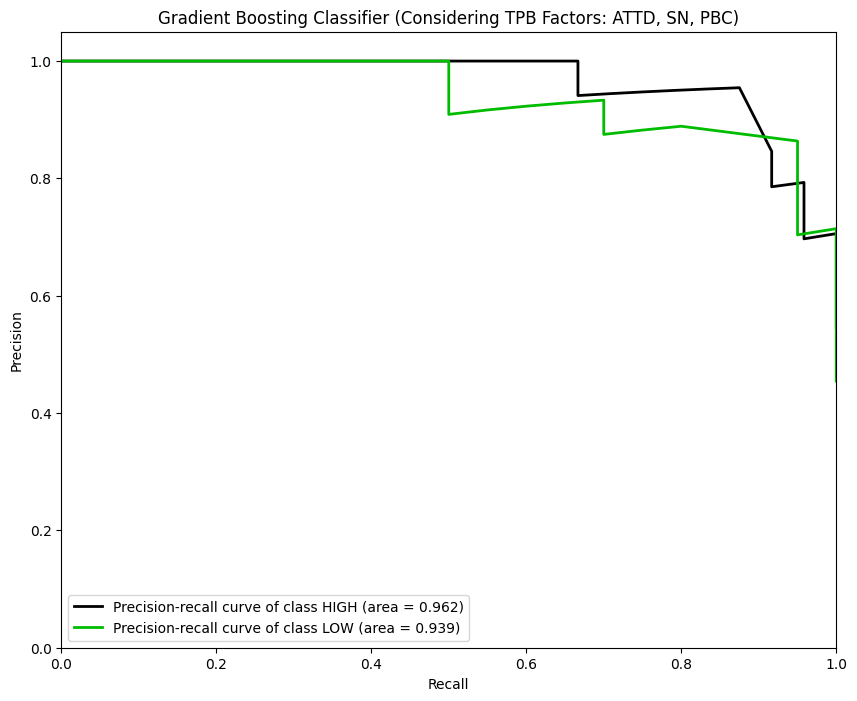

In [ ]:
#plotting PRC curve for GB
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (10,8), plot_micro = False,
                                   title = "Gradient Boosting Classifier (Considering TPB Factors: ATTD, SN, PBC)");

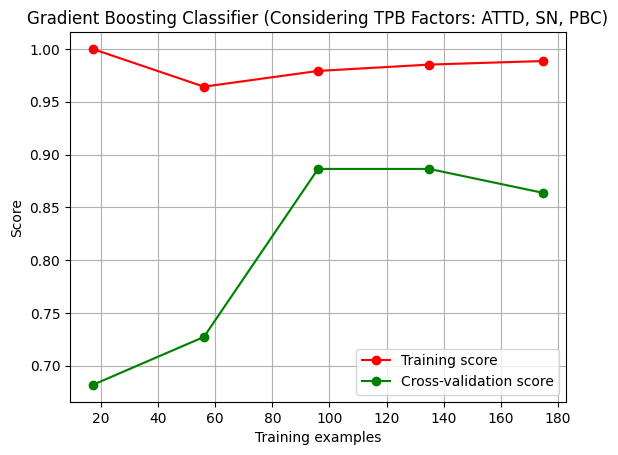

In [ ]:
#plotting learning curve for GB
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=10)
skplt.estimators.plot_learning_curve(xgb_clf, X, y, cv = cv,title = "Gradient Boosting Classifier (Considering TPB Factors: ATTD, SN, PBC)");